In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:50% !important:height:50% !important;}</style>"
HTML(style)

In [4]:
PATH_TO_DATA = '../data/Stepic_Machine_Learning/'

titanic_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'Titanic Machine Learning from Disaster/train.csv'))

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [7]:
X = pd.get_dummies(X)

In [8]:
X['Age'] = X.fillna({'Age': X['Age'].median()})

In [9]:
X.isnull().sum().sum()

0

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

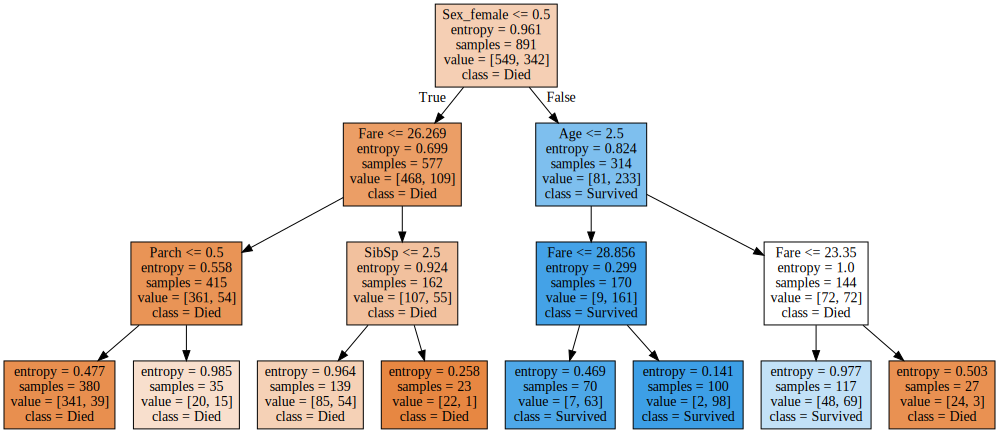

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'], 
    filled=True))

display(SVG(graph.pipe(format='svg')))

In [12]:
# import matplotlib.pyplot as plt
# import pydotplus
# import matplotlib.image as mpimg

# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz

# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(X),
#     class_names=['Died', 'Survived'], 
#     filled=True)

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('tree.png')

# plt.figure(figsize=(20,20))
# img = mpimg.imread(filename)
# imgplot = plt.imshow(img)

- **min_samples_split** - мінімальний розмір вибірки, на якому можна робити ще один спліт.
- **min_samples_leaf** - мінімальна розмір вибірки в листі
- **min_impurity_decrease** - мінімальне зниження "нечистоти" (змішання класів) вузла при поділі, щоб поділ відбувся

Чем больше значение min_samples_split, тем меньше тенденция к переобучению

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

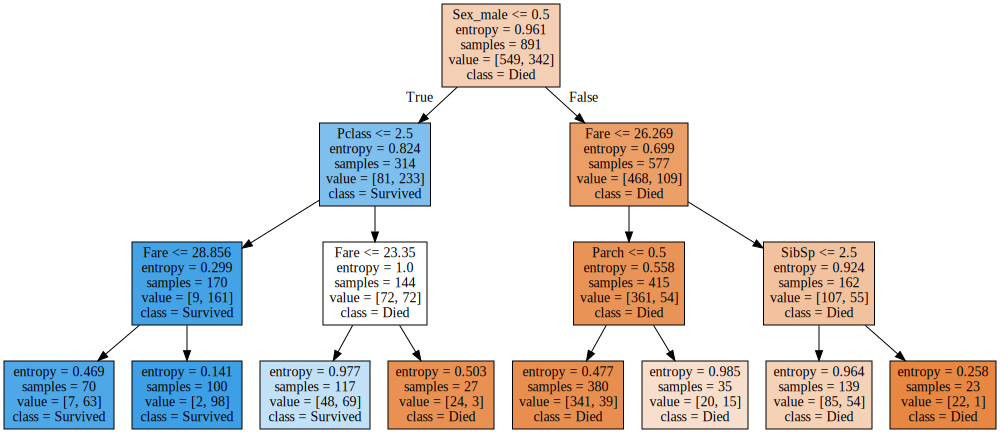

In [14]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'], 
    filled=True))

display(SVG(graph.pipe(format='svg')))

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
clf_rf = RandomForestClassifier()

In [17]:
params = {'n_estimators': [10, 20, 30], 
          'max_depth': [2, 5, 7, 10]}

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
grid_search_clf_rf = GridSearchCV(clf_rf, params, cv=5)

In [20]:
%%time
grid_search_clf_rf.fit(X_train, y_train)

Wall time: 2.36 s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid_search_clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [22]:
best_clf = grid_search_clf_rf.best_estimator_

In [23]:
best_clf.score(X_test, y_test)

0.7835820895522388

In [24]:
feature_importances = best_clf.feature_importances_

In [25]:
feature_importances_df = pd.DataFrame({'features': list(X_test), 
                                       'feature_importances': feature_importances})

In [26]:
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,feature_importances,features
5,0.269289,Sex_female
6,0.266255,Sex_male
4,0.147188,Fare
1,0.111425,Age
0,0.069352,Pclass
3,0.048205,Parch
9,0.033916,Embarked_S
2,0.031523,SibSp
7,0.017962,Embarked_C
8,0.004885,Embarked_Q


#### Задача 1

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

In [27]:
heart_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'heart.csv'))

In [28]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [30]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

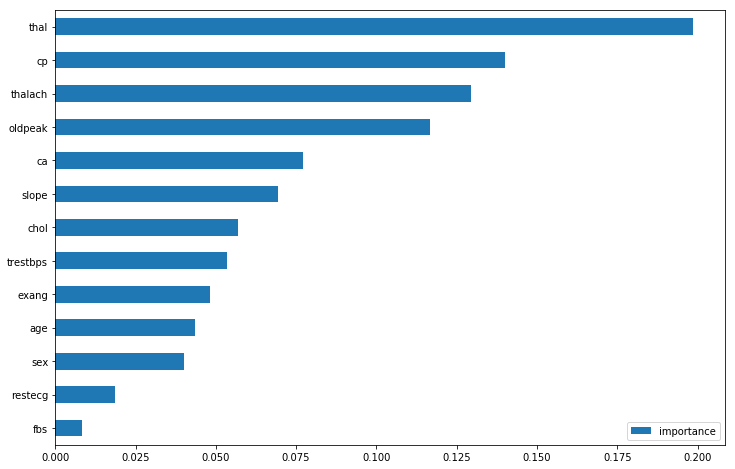

In [31]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

## Практические задания

#### Задача 1

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)

Параметры для выбора:
- n_estimators: от 10 до 50 с шагом 10
- max_depth: от 1 до 12 с шагом 2
- min_samples_leaf: от 1 до 7
- min_samples_split: от 2 до 9 с шагом 2

Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [32]:
training_mush_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'training_mush.csv'))
training_mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [46]:
training_mush_data['class'].value_counts()

0    3153
1    2940
Name: class, dtype: int64

In [47]:
X = training_mush_data.drop('class', axis=1)
y = training_mush_data['class']

In [48]:
clf_rf = RandomForestClassifier(random_state=0)

params = {'n_estimators': [10, 20, 30, 40, 50], 
          'max_depth': range(1, 12, 2), 
          'min_samples_leaf': range(1, 8), 
          'min_samples_split': range(2, 9, 2)}

In [49]:
%%time
grid_search_clf_rf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)
grid_search_clf_rf.fit(X, y)

Wall time: 5min 30s


In [50]:
grid_search_clf_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

#### Задача 2

Выберите правильные утверждения о важности фичей для нашего классификатора

In [51]:
best_clf = grid_search_clf_rf.best_estimator_

In [52]:
feature_importances = best_clf.feature_importances_

In [53]:
feature_importances_df = pd.DataFrame({'features': list(X), 
                                       'feature_importances': feature_importances})

feature_importances_df.sort_values(by='feature_importances', ascending=False).head()

,feature_importances,features
4,0.188376,odor
8,0.103861,gill-color
10,0.103793,stalk-root
19,0.083564,spore-print-color
6,0.080840,gill-spacing


#### Задача 3

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [54]:
testing_mush_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'testing_mush.csv'))
testing_mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [55]:
X_test = testing_mush_data

In [56]:
y_pred = best_clf.predict(X_test)

In [57]:
len(y_pred[y_pred == 1])

976

#### Задача 4

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам

In [58]:
testing_y_mush_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'testing_y_mush.csv'))
testing_y_mush_data.head()

,class
0,0
1,0
2,1
3,1
4,1


In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [60]:
y_true = testing_y_mush_data['class'].values
y_true

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [61]:
confusion_matrix(y_true, y_pred, [0, 1])

array([[1055,    0],
       [   0,  976]], dtype=int64)

Text(0.5,1,'Random Forest')

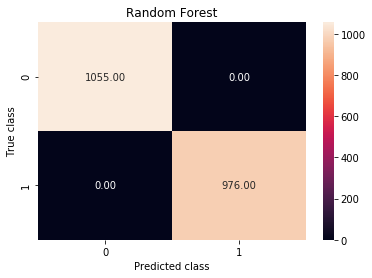

In [62]:
forest_cm = confusion_matrix(y_true, y_pred, [0, 1])
# sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
sns.heatmap(forest_cm, annot=True, fmt='.2f')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

#### Задача 5

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [63]:
invasion_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'invasion.csv'))
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [64]:
operative_information_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'operative_information.csv'))
operative_information_data.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [65]:
invasion_data['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64

In [66]:
invasion_data['class'] = invasion_data['class'].map({'transport': 0, 'fighter': 1, 'cruiser': 2})

In [67]:
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,0,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,0,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [68]:
X_train = invasion_data.drop('class', axis=1)
y_train = invasion_data['class']

X_test = operative_information_data

In [69]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
y_pred = clf_rf.predict(X_test)

In [71]:
pd.Series(y_pred).value_counts()

1    675
0    595
2    230
dtype: int64

#### Задача 6

Какая переменная оказалась самой важной для классифицирования кораблей?

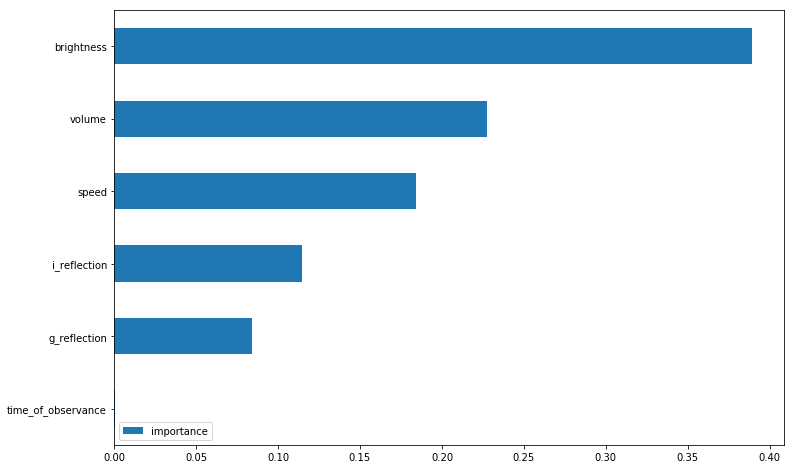

In [72]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [73]:
feature_importances = clf_rf.feature_importances_

feature_importances_df = pd.DataFrame({'features': list(X_train), 
                                       'feature_importances': feature_importances})

feature_importances_df.sort_values(by='feature_importances', ascending=False).head()

,feature_importances,features
3,0.389010,brightness
5,0.227657,volume
2,0.184017,speed
1,0.114564,i_reflection
0,0.084106,g_reflection


#### Задача 7

Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [74]:
space_can_be_a_dangerous_place_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'space_can_be_a_dangerous_place.csv'))
space_can_be_a_dangerous_place_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


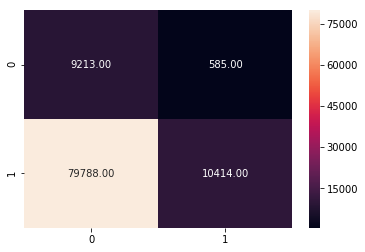

In [75]:
forest_cm = confusion_matrix(space_can_be_a_dangerous_place_data['dangerous'], 
                             space_can_be_a_dangerous_place_data['black_hole_is_near'], [0, 1])
sns.heatmap(forest_cm, annot=True, fmt='.2f');

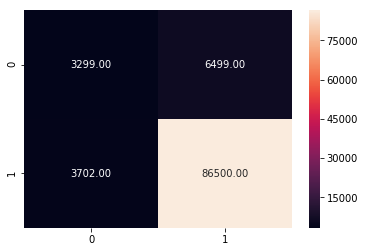

In [76]:
forest_cm = confusion_matrix(space_can_be_a_dangerous_place_data['dangerous'], 
                             space_can_be_a_dangerous_place_data['buggers_were_noticed'], [0, 1])
sns.heatmap(forest_cm, annot=True, fmt='.2f');

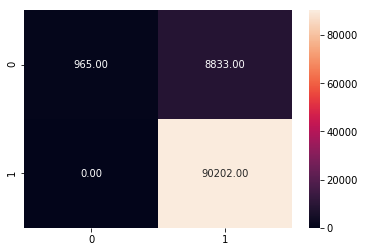

In [77]:
forest_cm = confusion_matrix(space_can_be_a_dangerous_place_data['dangerous'], 
                             space_can_be_a_dangerous_place_data['nearby_system_has_planemo'], [0, 1])
sns.heatmap(forest_cm, annot=True, fmt='.2f');

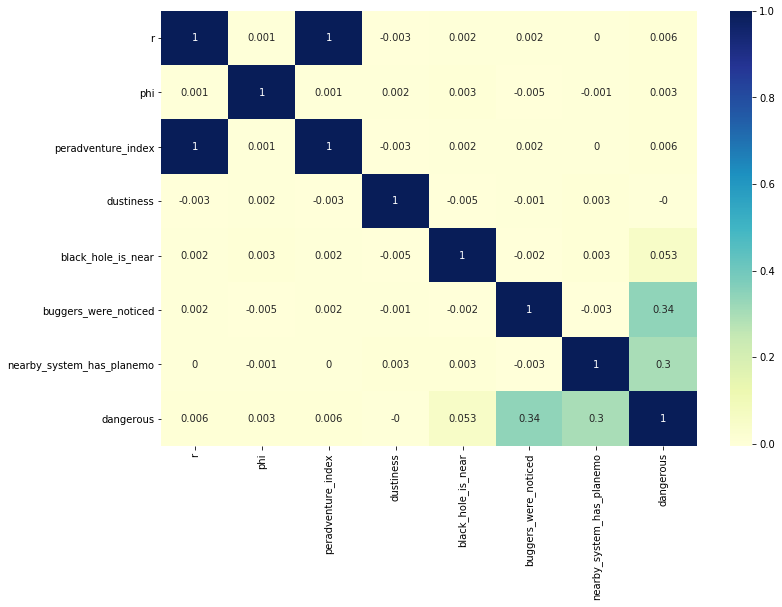

In [78]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(1,1,1)
sns.heatmap(space_can_be_a_dangerous_place_data.corr().round(3), cmap="YlGnBu", annot=True)
plt.show()

## Трюки в Pandas

In [80]:
movie_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'movie_metadata.csv'))
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [103]:
# movie_df.info()

In [83]:
movie_df.shape

(5043, 28)

In [84]:
genres = movie_df[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [85]:
for i in genres:
    print(i)

movie_title
genres


In [86]:
for i in genres.columns:
    print(i)

movie_title
genres


In [87]:
for row in genres.values:
    for value in row:
        print(value)

Avatar 
Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End 
Action|Adventure|Fantasy
Spectre 
Action|Adventure|Thriller
The Dark Knight Rises 
Action|Thriller
Star Wars: Episode VII - The Force Awakens             
Documentary
John Carter 
Action|Adventure|Sci-Fi
Spider-Man 3 
Action|Adventure|Romance
Tangled 
Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance
Avengers: Age of Ultron 
Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince 
Adventure|Family|Fantasy|Mystery
Batman v Superman: Dawn of Justice 
Action|Adventure|Sci-Fi
Superman Returns 
Action|Adventure|Sci-Fi
Quantum of Solace 
Action|Adventure
Pirates of the Caribbean: Dead Man's Chest 
Action|Adventure|Fantasy
The Lone Ranger 
Action|Adventure|Western
Man of Steel 
Action|Adventure|Fantasy|Sci-Fi
The Chronicles of Narnia: Prince Caspian 
Action|Adventure|Family|Fantasy
The Avengers 
Action|Adventure|Sci-Fi
Pirates of the Caribbean: On Stranger Tides 
Action|Adventure|Fantasy
Men in Bl

Drama|Romance
Hotel Transylvania 2 
Animation|Comedy|Family|Fantasy
Bewitched             
Comedy|Family|Fantasy
Fantasia 2000 
Animation|Family|Fantasy|Music
The Time Machine 
Action|Adventure|Sci-Fi
Mighty Joe Young 
Action|Adventure|Family|Fantasy|Thriller
Swordfish 
Action|Crime|Thriller
The Legend of Zorro 
Action|Adventure|Western
What Dreams May Come 
Drama|Fantasy|Romance
Little Nicky 
Comedy|Fantasy
The Brothers Grimm 
Action|Adventure|Comedy|Fantasy|Thriller
Mars Attacks! 
Action|Comedy|Sci-Fi
Evolution 
Drama|Horror|Mystery|Sci-Fi
The Edge 
Action|Adventure|Drama|Thriller
Surrogates 
Action|Sci-Fi|Thriller
Thirteen Days 
Drama|History|Thriller
Daylight 
Action|Adventure|Drama|Thriller
Walking with Dinosaurs 3D 
Adventure|Animation|Family
Battlefield Earth 
Action|Adventure|Sci-Fi
Looney Tunes: Back in Action 
Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi
Nine 
Drama|Musical|Romance
Timeline 
Action|Adventure|Sci-Fi
The Postman 
Action|Adventure|Drama|Sci-Fi
Babe: Pig in t

Man on the Moon 
Biography|Comedy|Drama
Casino 
Biography|Crime|Drama
From Paris with Love 
Action|Thriller
Bulletproof Monk 
Action|Comedy|Fantasy
Me, Myself & Irene 
Comedy
Barnyard 
Animation|Comedy|Family
Deck the Halls 
Comedy|Family
The Twilight Saga: New Moon 
Adventure|Drama|Fantasy|Romance
Shrek 
Adventure|Animation|Comedy|Family|Fantasy
The Adjustment Bureau 
Romance|Sci-Fi|Thriller
Robin Hood: Prince of Thieves 
Action|Adventure|Drama|Romance
Jerry Maguire 
Comedy|Drama|Romance|Sport
Ted 
Comedy|Fantasy
As Good as It Gets 
Comedy|Drama|Romance
Patch Adams 
Biography|Comedy|Drama|Romance
Anchorman 2: The Legend Continues 
Comedy
Mr. Deeds 
Comedy|Romance
Super 8 
Mystery|Sci-Fi|Thriller
Erin Brockovich 
Biography|Drama
How to Lose a Guy in 10 Days 
Comedy|Romance
22 Jump Street 
Action|Comedy|Crime
Interview with the Vampire: The Vampire Chronicles 
Drama|Fantasy|Horror
Yes Man 
Comedy|Romance
Central Intelligence 
Action|Comedy|Crime
Stepmom 
Comedy|Drama
Daddy's Home 
Comed

Comedy
Species 
Action|Horror|Sci-Fi|Thriller
A Nightmare on Elm Street 
Horror
The Cell 
Horror|Sci-Fi|Thriller
The Man in the Iron Mask 
Action|Adventure
Secretariat 
Biography|Drama|Family|History|Sport
TMNT 
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi
Radio 
Biography|Drama|Sport
Friends with Benefits 
Comedy|Romance
Neighbors 2: Sorority Rising 
Comedy
Saving Mr. Banks 
Biography|Comedy|Drama|History|Music
Malcolm X 
Biography|Drama|History|Romance
This Is 40 
Comedy
Old Dogs 
Comedy|Family
Underworld: Rise of the Lycans 
Action|Adventure|Fantasy|Sci-Fi|Thriller
License to Wed 
Comedy|Romance
The Benchwarmers 
Comedy|Romance|Sport
Must Love Dogs 
Comedy|Romance
Donnie Brasco 
Biography|Crime|Drama
Resident Evil 
Action|Horror|Sci-Fi
Poltergeist 
Fantasy|Horror
The Ladykillers 
Comedy|Crime|Thriller
Max Payne 
Action|Crime|Drama|Mystery|Thriller
In Time 
Action|Sci-Fi|Thriller
The Back-up Plan 
Comedy|Romance
Something Borrowed 
Comedy|Drama|Romance
Hit the Floor       

Comedy
Million Dollar Arm 
Biography|Drama|Sport
The Giver 
Drama|Romance|Sci-Fi
What a Girl Wants 
Comedy|Drama|Family|Romance
Jeepers Creepers II 
Horror
Good Luck Chuck 
Comedy|Romance
Cradle 2 the Grave 
Action|Crime|Drama|Thriller
The Hours 
Drama|Romance
She's the Man 
Comedy|Romance
Mr. Bean's Holiday 
Comedy|Family
Anacondas: The Hunt for the Blood Orchid 
Action|Adventure|Horror|Thriller
Blood Ties 
Crime|Drama|Thriller
August Rush 
Drama|Music
Elizabeth 
Biography|Drama|History
Bride of Chucky 
Comedy|Fantasy|Horror|Romance
Tora! Tora! Tora! 
Action|Drama|History|War
Spice World 
Comedy|Family|Music
The Sitter 
Comedy
Dance Flick 
Action|Comedy|Music
The Shawshank Redemption 
Crime|Drama
Crocodile Dundee in Los Angeles 
Adventure|Comedy|Crime
Kingpin 
Comedy|Sport
The Gambler 
Crime|Drama|Thriller
August: Osage County 
Drama
Ice Princess 
Comedy|Drama|Family|Sport
A Lot Like Love 
Comedy|Drama|Romance
Eddie the Eagle 
Biography|Comedy|Drama|Sport
He Got Game 
Drama|Sport
Don 

Glory 
Drama|History|War
Spy Hard 
Action|Comedy
The Fog 
Fantasy|Horror
Soul Surfer 
Biography|Drama|Family|Sport
Catch-22 
Comedy|Drama|War
Observe and Report 
Comedy|Crime|Drama
Conan the Destroyer 
Action|Adventure|Fantasy
Raging Bull 
Biography|Drama|Sport
Love Happens 
Drama|Romance
Young Sherlock Holmes 
Adventure|Fantasy|Mystery|Thriller
Fame 
Comedy|Drama|Musical|Romance
127 Hours 
Adventure|Biography|Drama|Thriller
Small Time Crooks 
Comedy|Crime
Center Stage 
Drama|Music|Romance
Love the Coopers 
Comedy
Catch That Kid 
Comedy|Crime
Life as a House 
Drama
Steve Jobs 
Biography|Drama
I Love You, Beth Cooper 
Comedy|Romance
Youth in Revolt 
Comedy|Drama|Romance
The Legend of the Lone Ranger 
Action|Adventure|Western
The Tailor of Panama 
Drama|Thriller
Blow Out 
Mystery|Thriller
Getaway 
Action|Crime|Thriller
The Ice Storm 
Drama
And So It Goes 
Comedy|Drama|Romance
Troop Beverly Hills 
Adventure|Comedy
Being Julia 
Comedy|Drama|Romance
9½ Weeks 
Drama|Romance
Dragonslayer 
Act

American Pie 
Comedy
Ernest & Celestine 
Animation|Comedy|Crime|Drama|Family
The Golden Child 
Action|Adventure|Comedy|Fantasy|Mystery
Think Like a Man 
Comedy|Romance
Barbershop 
Comedy|Drama
Star Trek II: The Wrath of Khan 
Action|Adventure|Sci-Fi
Ace Ventura: Pet Detective 
Comedy
WarGames 
Sci-Fi|Thriller
Witness 
Crime|Drama|Romance|Thriller
Act of Valor 
Action|Adventure|Drama|Thriller|War
Step Up 
Crime|Drama|Music|Romance
Beavis and Butt-Head Do America 
Adventure|Animation|Comedy|Crime
Jackie Brown 
Crime|Thriller
Harold & Kumar Escape from Guantanamo Bay 
Adventure|Comedy
Chronicle 
Drama|Sci-Fi|Thriller
Yentl 
Drama|Musical|Romance
Time Bandits 
Adventure|Comedy|Fantasy|Sci-Fi
Crossroads 
Comedy|Drama
Project X 
Comedy|Crime
Patton 
Biography|Drama|War
One Hour Photo 
Drama|Thriller
Quarantine 
Horror|Sci-Fi|Thriller
The Eye 
Horror|Mystery
Johnson Family Vacation 
Comedy
How High 
Comedy|Fantasy
The Muppet Christmas Carol 
Comedy|Drama|Family|Fantasy|Musical
Casino Royale 


Action|Comedy|Crime
Pathology 
Crime|Horror|Thriller
Wuthering Heights             
Drama|Romance
10th & Wolf 
Crime|Drama|Thriller
Dear Wendy 
Comedy|Crime|Drama|Romance
Aloft 
Drama
Akira 
Action|Animation|Sci-Fi
The Death and Life of Bobby Z 
Action|Crime|Thriller
The Rocket: The Legend of Rocket Richard 
Biography|Drama|Sport
Swelter 
Action|Crime|Drama|Thriller
My Lucky Star 
Action|Adventure|Comedy|Romance
Imagine Me & You 
Comedy|Drama|Romance
Mr. Church 
Drama
Swimming Pool 
Crime|Drama|Mystery|Thriller
Green Street 3: Never Back Down 
Action|Drama
The Blood of Heroes 
Action|Sci-Fi|Sport
Code of Honor 
Action
Driving Miss Daisy 
Comedy|Drama|Family
Soul Food 
Comedy|Drama
Rumble in the Bronx 
Action|Comedy
Far from Men 
Drama|War|Western
Thank You for Smoking 
Comedy|Drama
Hostel: Part II 
Horror
An Education 
Drama
Shopgirl 
Drama|Romance
The Hotel New Hampshire 
Comedy|Drama|Romance
Narc 
Crime|Drama|Mystery|Thriller
Men with Brooms 
Comedy|Drama|Romance|Sport
Witless Protec

Comedy|Fantasy
The Rules of Attraction 
Comedy|Drama|Romance
Topaz 
Drama|Thriller
Let's Go to Prison 
Comedy|Crime
Four Rooms 
Comedy|Fantasy
Secretary 
Comedy|Drama|Romance
The Real Cancun 
Documentary
Talk Radio 
Drama
Waiting for Guffman 
Comedy
Love Stinks 
Comedy
You Kill Me 
Comedy|Crime|Romance|Thriller
Thumbsucker 
Comedy|Drama
Red State 
Action|Crime|Horror|Thriller
Mirrormask 
Adventure|Fantasy
Samsara 
Documentary|Music
The Barbarians 
Adventure|Fantasy
The Art of Getting By 
Drama|Romance
Zipper 
Drama|Thriller
Poolhall Junkies 
Drama|Thriller
The Loss of Sexual Innocence 
Drama
Holy Motors 
Drama|Fantasy
Joe 
Drama
Shooting Fish 
Comedy|Crime|Romance
Prison 
Crime|Drama|Horror|Thriller
Psycho Beach Party 
Comedy|Horror|Mystery
The Big Tease 
Comedy
Buen Día, Ramón 
Drama
Trust 
Crime|Drama|Thriller
An Everlasting Piece 
Comedy
Among Giants 
Comedy|Romance
Adore 
Drama|Romance
The Velocity of Gary 
Comedy|Drama|Romance
Mondays in the Sun 
Comedy|Drama
Stake Land 
Drama|Hor

The Ballad of Jack and Rose 
Drama
The To Do List 
Comedy|Romance
Killing Zoe 
Crime|Drama|Thriller
The Believer 
Drama
Snow Angels 
Drama|Romance
Unsullied 
Action|Horror|Thriller
Session 9 
Horror|Mystery
I Want Someone to Eat Cheese With 
Comedy|Romance
Mooz-Lum 
Drama|Family
Hatchet 
Comedy|Horror
Modern Times 
Comedy|Drama|Family
Stolen Summer 
Drama
My Name Is Bruce 
Comedy|Fantasy
The Salon 
Comedy|Drama
Road Hard 
Comedy
Forty Shades of Blue 
Drama|Music|Romance
Amigo 
Drama|War
Pontypool 
Fantasy|Horror
Trucker 
Drama
Me You and Five Bucks 
Comedy|Drama|Romance
The Lords of Salem 
Drama|Fantasy|Horror|Thriller
Housebound 
Comedy|Horror|Mystery
Wal-Mart: The High Cost of Low Price 
Documentary
Fetching Cody 
Drama|Fantasy|Romance
Once Upon a Time in Queens 
Comedy|Drama
Closer to the Moon 
Comedy|Drama
Mutant World 
Sci-Fi
Growing Up Smith 
Comedy|Drama|Family
Checkmate 
Action|Crime|Thriller
Jack Reacher 
Action|Crime|Mystery|Thriller
#Horror 
Drama|Horror|Mystery|Thriller
Win

Yesterday Was a Lie 
Drama|Music|Mystery|Romance|Sci-Fi
Theresa Is a Mother 
Comedy|Drama|Music
H. 
Drama|Sci-Fi|Thriller
Archaeology of a Woman 
Drama
Children of Heaven 
Drama|Family
Weekend 
Drama|Romance
She's Gotta Have It 
Comedy|Romance
Butterfly Girl 
Documentary
The World Is Mine 
Drama
Another Earth 
Drama|Romance|Sci-Fi
The Calling 
Thriller
Sweet Sweetback's Baadasssss Song 
Crime|Drama|Thriller
Perfect Cowboy 
Drama
Tadpole 
Comedy|Drama|Romance
Once 
Drama|Music|Romance
The Woman Chaser 
Comedy
The Horse Boy 
Documentary
When the Lights Went Out 
Horror
Heroes of Dirt 
Action|Drama|Sport
The Texas Chain Saw Massacre 
Horror|Thriller
A Charlie Brown Christmas 
Animation|Comedy|Family
Antarctic Edge: 70° South 
Adventure|Documentary
Aroused 
Documentary
Top Spin 
Documentary
Roger & Me 
Documentary
Cat People 
Fantasy|Horror|Thriller
An American in Hollywood 
Drama
Sound of My Voice 
Drama|Mystery|Sci-Fi|Thriller
The Brain That Sings 
Documentary|Family
The Blood of My Brot

In [90]:
def reversator(value):
    return value[::-1]

In [91]:
for row in genres.values:
    for value in row:
        print(reversator(value))

 ratavA
iF-icS|ysatnaF|erutnevdA|noitcA
 dnE s'dlroW tA :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 ertcepS
rellirhT|erutnevdA|noitcA
 sesiR thginK kraD ehT
rellirhT|noitcA
             snekawA ecroF ehT - IIV edosipE :sraW ratS
yratnemucoD
 retraC nhoJ
iF-icS|erutnevdA|noitcA
 3 naM-redipS
ecnamoR|erutnevdA|noitcA
 delgnaT
ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 nortlU fo egA :sregnevA
iF-icS|erutnevdA|noitcA
 ecnirP doolB-flaH eht dna rettoP yrraH
yretsyM|ysatnaF|ylimaF|erutnevdA
 ecitsuJ fo nwaD :namrepuS v namtaB
iF-icS|erutnevdA|noitcA
 snruteR namrepuS
iF-icS|erutnevdA|noitcA
 ecaloS fo mutnauQ
erutnevdA|noitcA
 tsehC s'naM daeD :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 regnaR enoL ehT
nretseW|erutnevdA|noitcA
 leetS fo naM
iF-icS|ysatnaF|erutnevdA|noitcA
 naipsaC ecnirP :ainraN fo selcinorhC ehT
ysatnaF|ylimaF|erutnevdA|noitcA
 sregnevA ehT
iF-icS|erutnevdA|noitcA
 sediT regnartS nO :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 3 kcalB 

 tsudratS
ecnamoR|ysatnaF|ylimaF|erutnevdA
 tebiT ni sraeY neveS
raW|yrotsiH|amarD|yhpargoiB|erutnevdA
 ammeliD ehT
amarD|ydemoC
 ynapmoC daB
rellirhT|ydemoC|erutnevdA|noitcA
 mooD
iF-icS|rorroH|erutnevdA|noitcA
 ypS I
rellirhT|ydemoC|erutnevdA|noitcA
 gninekawA :dlrowrednU
rorroH|ysatnaF|noitcA
 segA fo kcoR
ecnamoR|lacisuM|amarD|ydemoC
 raW s'traH
raW|amarD
 etilE relliK
rellirhT|emirC|noitcA
 llabrelloR
tropS|iF-icS|noitcA
 reveS .sv skcE :citsillaB
rellirhT|iF-icS|emirC|noitcA
 niaR draH
rellirhT|amarD|emirC|noitcA
 senoJ sisomsO
ysatnaF|ylimaF|emirC|ydemoC|noitaminA|erutnevdA|noitcA
 nruteR s'yhtoroD :zO fo sdnegeL
lacisuM|ysatnaF|ylimaF|noitaminA|erutnevdA
 tahkcalB
rellirhT|yretsyM|amarD|emirC|noitcA
 worromoT fo dlroW eht dna niatpaC ykS
rellirhT|iF-icS|yretsyM|erutnevdA|noitcA
 2 tcnitsnI cisaB
rellirhT|yretsyM|emirC
 nalP epacsE
rellirhT|iF-icS|yretsyM|emirC|noitcA
 selucreH fo dnegeL ehT
ysatnaF|erutnevdA|noitcA
 sraeF llA fo muS ehT
rellirhT|amarD|noitcA
 espilcE :agaS thgi

rellirhT|emirC|noitcA
 hsilgnE ynnhoJ
ydemoC|erutnevdA|noitcA
 ylluB tnA ehT
ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 enuD
iF-icS|erutnevdA|noitcA
 esrevinU eht ssorcA
ecnamoR|lacisuM|ysatnaF|amarD
 daoR yranoituloveR
ecnamoR|amarD
 skcolB 61
rellirhT|amarD|emirC|noitcA
 .D.A nolybaB
rellirhT|iF-icS|erutnevdA|noitcA
 naM remmilG ehT
rellirhT|amarD|emirC|ydemoC|noitcA
 yticilpitluM
iF-icS|ecnamoR|ydemoC
 cittA eht ni sneilA
iF-icS|ysatnaF|ylimaF|ydemoC|erutnevdA
 egdelP ehT
rellirhT|yretsyM|amarD|emirC
 srecudorP ehT
lacisuM|ydemoC
 dderD
iF-icS|noitcA
 motnahP ehT
ysatnaF|ydemoC|erutnevdA|noitcA
 sesroH ytterP eht llA
nretseW|ecnamoR|amarD
 noxiN
yrotsiH|amarD|yhpargoiB
 retirW tsohG ehT
rellirhT|yretsyM
 gnisiR peeD
iF-icS|rorroH|erutnevdA|noitcA
 annA .tS ta elcariM
raW|rellirhT|amarD|emirC|noitcA
 rewolF nedloG eht fo esruC
ecnamoR|amarD
 suoregnaD kokgnaB
rellirhT|emirC|noitcA
 elbuorT giB
rellirhT|emirC|ydemoC
 arelohC fo emiT eht ni evoL
ecnamoR|amarD
             denruteR ehT


ecnamoR|ylimaF|ydemoC|noitaminA|erutnevdA
 sediT fo ecnirP ehT
ecnamoR|amarD
 llaF eht fo sdnegeL
nretseW|raW|ecnamoR|amarD
 riA eht ni pU
ecnamoR|amarD
 tdimhcS tuobA
amarD|ydemoC
 seidoB mraW
ecnamoR|rorroH|ydemoC
 repooL
rellirhT|iF-icS|amarD|emirC|noitcA
 htraE ot nwoD
ysatnaF|ydemoC
 ebaB
ylimaF|amarD|ydemoC
 sgnirpS epoH
ecnamoR|amarD|ydemoC
 llahsraM haraS gnittegroF
ecnamoR|amarD|ydemoC
             sthgiL thgiN yadirF
tropS|amarD
 srehtorB ruoF
rellirhT|yretsyM|amarD|emirC|noitcA
 amaM ybaB
ecnamoR|ydemoC
 staolF epoH
ecnamoR|amarD
 sraW edirB
ecnamoR|ydemoC
 elddaP a tuohtiW
yretsyM|ydemoC|erutnevdA
 03 no gnioG 31
ecnamoR|ysatnaF|ydemoC
 siraP ni thgindiM
ecnamoR|ysatnaF|ydemoC
 boJ tuN ehT
ylimaF|ydemoC|noitaminA|erutnevdA
 wolB
amarD|emirC|yhpargoiB
 elttoB a ni egasseM
ecnamoR|amarD
 reitnorF laniF ehT :V kerT ratS
rellirhT|iF-icS|erutnevdA|noitcA
 ekiM ekiL
tropS|ysatnaF|ylimaF|ydemoC
 tlusnI laniF ehT :3/1 33 nuG dekaN
emirC|ydemoC
 lliK a ot weiV A
rellirhT|erutnevdA|n

 tnorfemoH
rellirhT|amarD|emirC|noitcA
 eripmaV elttiL ehT
ysatnaF|ylimaF|ydemoC|erutnevdA
 seebakcuH traeH I
ydemoC
 3 poCoboR
rellirhT|iF-icS|emirC|noitcA
 2 edoC agemO ehT :oddigeM
rellirhT|iF-icS|ysatnaF|erutnevdA|noitcA
 iliL gnilraD
raW|ecnamoR|lacisuM|amarD|ydemoC
 thgiR-oD yelduD
ecnamoR|ylimaF|ydemoC
 deleufeR retropsnarT ehT
rellirhT|emirC|noitcA
 enitrebiL ehT
ecnamoR|amarD
 kooB kcalB
raW|rellirhT|amarD
 leoN xueyoJ
raW|ecnamoR|cisuM|yrotsiH|amarD
 nuR dna tiH
ecnamoR|ydemoC|noitcA
 yenoM daM
rellirhT|emirC|ydemoC
 peelS ot oG I erofeB
rellirhT|yretsyM|amarD
 rerecroS
rellirhT|amarD|erutnevdA
 enotS
rellirhT|amarD
 erèiloM
yrotsiH|ydemoC
 ecanruF eht fo tuO
rellirhT|amarD|emirC
 notyalC leahciM
rellirhT|yretsyM|amarD|emirC
 snaciremA wolleF yM
ydemoC|erutnevdA
 daoR notgnilrA
rellirhT|amarD|emirC
 sgodrednU
tropS|ylimaF|noitaminA|erutnevdA
 evoL htiw emoR oT
ecnamoR|ydemoC
 xoferiF
rellirhT|erutnevdA|noitcA
 tucnU & regnoL reggiB :kraP htuoS
lacisuM|ysatnaF|ydemoC|noitaminA

             seireS VT ehT :maercS
rellirhT|yretsyM|rorroH|amarD|emirC
 feihcrekdnaH wolleY ehT
ecnamoR|amarD
 elpruP roloC ehT
amarD
 evaW ladiT
rellirhT|amarD|ydemoC|noitcA
 ruH-neB
yrotsiH|amarD|erutnevdA
 emaG noitatimI ehT
raW|rellirhT|amarD|yhpargoiB
 nimajneB etavirP
raW|ydemoC
 rethguaD s'reniM laoC
lacisuM|cisuM|amarD|yhpargoiB
 diK ypmiW a fo yraiD
ylimaF|ydemoC
 amaM
rorroH|ysatnaF
 neewollaH
rellirhT|rorroH
 noitacaV s'noopmaL lanoitaN
ydemoC|erutnevdA
 apdnarG daB
ydemoC
 neeuQ ehT
amarD|yhpargoiB
 eciujelteeB
ysatnaF|ydemoC
 ?deirraM teG I diD yhW
amarD|ydemoC
 nemoW elttiL
ecnamoR|ylimaF|amarD
 kcalB ni namoW ehT
rellirhT|rorroH|ysatnaF|amarD
 sllaC regnartS a nehW
rellirhT|rorroH
 raiL taF giB
ylimaF|ydemoC|erutnevdA
 retnuH reeD ehT
raW|amarD
 goD eht gaW
amarD|ydemoC
 eivoM eriuGcM eizziL ehT
ecnamoR|cisuM|ylimaF|ydemoC|erutnevdA
 hctinS
rellirhT|amarD|noitcA
 supmarK
rorroH|ysatnaF|ydemoC
 ytlucaF ehT
iF-icS|yretsyM|rorroH
 tI htiw oD ot toG evoL s'tahW
cisuM|amarD|y

amarD|ydemoC
 tuO s'loohcS :sseceR
iF-icS|yretsyM|ylimaF|ydemoC|noitaminA
 emodrednuhT dnoyeB xaM daM
rellirhT|iF-icS|erutnevdA|noitcA
 odnammoC
rellirhT|erutnevdA|noitcA
 yoB ehT
rellirhT|yretsyM|rorroH
 liveD
rellirhT|yretsyM|rorroH
 txeN retfA yadirF
amarD|ydemoC
 3 retpahC :suoidisnI
rellirhT|rorroH|ysatnaF
 nogarD tsaL ehT
cisuM|amarD|ydemoC|noitcA
 hctanS
emirC|ydemoC
 naM rewomnwaL ehT
iF-icS|rorroH
 tsilyalP etinifnI s'haroN dna kciN
ecnamoR|cisuM|amarD|ydemoC
 amgoD
ysatnaF|amarD|ydemoC|erutnevdA
 sretsiS regnaB ehT
amarD|ydemoC
 eivoM ehT :enoZ thgiliwT
iF-icS|rorroH|ysatnaF
 esuoH daoR
rellirhT|noitcA
 emahS ytriD nwoD woL A
emirC|ydemoC|noitcA
 nafmiwS
rellirhT|amarD
 htnoM eht fo eeyolpmE
ecnamoR|ydemoC
 tiaW yldraH t'naC
ecnamoR|ydemoC
 sredistuO ehT
amarD|emirC
 nogarD s'eteP
ysatnaF|ylimaF|erutnevdA
 enoZ daeD ehT
rellirhT|iF-icS|rorroH
 2 retsiniS
rellirhT|yretsyM|rorroH
 elkrapS
cisuM|amarD
 enitnelaV
rellirhT|yretsyM|rorroH
 dniK htruoF ehT
rellirhT|iF-icS|yretsyM
 n

 5 neewollaH
rellirhT|rorroH
 einreB
amarD|emirC|ydemoC
 naecO eht fo sebirT :D3 selahW dna snihploD
trohS|yratnemucoD|erutnevdA
 kcolloP
amarD|yhpargoiB
 setteragiC 002
ecnamoR|amarD|ydemoC
 sdroW ehT
rellirhT|ecnamoR|yretsyM|amarD
 erdaP im ed asaC
nretseW|ydemoC
 dnalsI ytiC
amarD|ydemoC
 drauG ehT
rellirhT|emirC|ydemoC
 egelloC
ydemoC
 sediciuS nigriV ehT
ecnamoR|amarD
 ecioV elttiL
ecnamoR|cisuM|amarD|ydemoC
 hcraM ssiM
ecnamoR|ydemoC
 ereH saW I hsiW
amarD|ydemoC
 elbitsiserrI ylpmiS
ecnamoR|ysatnaF|amarD|ydemoC
             sraM acinoreV
yretsyM|amarD|emirC
 hcnI yrgnA eht dna giwdeH
lacisuM|cisuM|amarD|ydemoC
 gnortS eht ylnO
amarD|noitcA
 evoL fo sseddoG
rellirhT|yretsyM|rorroH|amarD
 ssalG derettahS
yrotsiH|amarD
 eniacovoN
rellirhT|amarD|emirC|ydemoC
 sregnartS fo ssenisuB ehT
rellirhT|amarD
 hcnuB dliW ehT
nretseW|erutnevdA|noitcA
 ssenkcaW ehT
ecnamoR|amarD|ydemoC
 yrebboR niarT taerG ehT
rellirhT|amarD|emirC|erutnevdA
 rallaC nrevroM
amarD
 emiT fo latroP eht hguorhT :2 r

 emitraW gniruD efiL
amarD|ydemoC
 ecnaegneV ydaL
amarD|emirC
 retsiS s'trazoM
ecnamoR|cisuM|amarD|yhpargoiB
 enihcaM naeM
tropS|amarD|ydemoC
 delixE
rellirhT|emirC|noitcA
 nrohtkcalB
nretseW|erutnevdA|noitcA
 revE-4 ayliL
amarD|emirC
 efiL.retfA
rellirhT|yretsyM|rorroH|amarD
 ylguF
rellirhT|amarD
 tseN s'ookcuC eht revO welF enO
amarD
 sluoS fo tenibaC ehT :ellivretsnoM s'enitS .L.R
ydemoC
 eivoM tneliS
ecnamoR|ydemoC
 tfilriA
raW|rellirhT|yrotsiH|amarD|noitcA
             selbaG neerG fo ennA
ylimaF|amarD
 gnisiR noclaF
erutnevdA|noitcA
 yeneewS ehT
amarD|emirC|noitcA
 tsaeB yxeS
rellirhT|emirC
 yenoM ysaE
rellirhT|amarD|emirC|noitcA
 rediR elahW
ylimaF|amarD
 aaP
amarD|ydemoC
 ograC
rellirhT|iF-icS|yretsyM
 naP
ysatnaF|ylimaF|erutnevdA
 lacisuM loohcS hgiH
ecnamoR|lacisuM|cisuM|ylimaF|amarD|ydemoC
             modgniK laminA
amarD|emirC
 dnalsI gnoL no htaeD dna evoL
amarD|ydemoC
 hctaW thgiN
rellirhT|ysatnaF
 emaG gniyrC ehT
rellirhT|ecnamoR|amarD|emirC
 s'ykroP
ydemoC
 daeD eht fo

 eriseD demaN racteertS A
amarD
 bmoB eht evoL dna gniyrroW potS ot denraeL I woH :ro evolegnartS .rD
ydemoC
 oramA erdap led nemirc lE
ecnamoR|amarD
 dliW nrehtuoS eht fo stsaeB
ysatnaF|amarD
 sepA eht fo tenalP eht rof elttaB
iF-icS|noitcA
 rehctacgnoS
cisuM|amarD
 dnuorG rehgiH
amarD
 ulaaV
ecnamoR|ydemoC
 dloS revE eivoM tsetaerG ehT
yratnemucoD|ydemoC
 rehtoM daeD siH dna dE
rorroH|ydemoC
 snaicigaM dna srelevarT
amarD|erutnevdA
 hgiH mE' gnaH
nretseW
 .A.S.U - enildaeD
rioN-mliF|amarD|emirC
 emilbuS
rellirhT|rorroH
 ffunS ot ediuG s'rennigeB A
rellirhT|rorroH|ydemoC
 retsasyaD ecnednepednI
iF-icS|noitcA
 sdneirF lanoitcnufsyD
amarD|ydemoC
 nuR aloL nuR
amarD|emirC
 yaM
rorroH|amarD
 dliW eht tsniagA
ylimaF|erutnevdA
 revaC eht deT fo yrotS ehT :kraD gniviL
rorroH
 nooM emaS eht rednU
amarD|erutnevdA
 sepA eht fo tenalP eht fo tseuqnoC
iF-icS|noitcA
 moordeB eht nI
amarD|emirC
 evarG ruoY no tipS I
rellirhT|rorroH
 saxeT ,yppaH
ecnamoR|emirC|ydemoC
 evoL fo remmuS yM
ecnamoR|amarD

amarD|ydemoC
 iseD naciremA
ecnamoR|amarD|ydemoC
 sgniW s'liveD eht tsdimA
amarD|emirC|noitcA
 ebuC
rellirhT|iF-icS|yretsyM
 sehportsataC rehtO dna evoL
ecnamoR|ydemoC
 !nosreP egnartS a deirraM I
iF-icS|ysatnaF|amarD|ydemoC|noitaminA
 rebmevoN
rellirhT|yretsyM|amarD
 yzarC ekiL
ecnamoR|amarD
 doolB dna hteeT
rorroH
 nwoT raguS
cisuM|ydemoC
 letoM ehT
amarD|ydemoC
 snoynaC ehT
rellirhT|amarD
             yellaV yppaH
amarD|emirC
 stuO eht nO
amarD
 seirotS nugtohS
rellirhT|amarD
 maxE
rellirhT|yretsyM
 emiT fo sregniF ykcitS ehT
iF-icS
 lacisuM loohcS yadnuS
lacisuM|amarD
 tsuR
amarD
 knI
iF-icS|ysatnaF|amarD|noitcA
 ynnuB samtsirhC ehT
ylimaF|amarD
 elpoeP suseJ
trohS|ydemoC
 ylfrettuB
amarD|emirC
 dediviDnU
yratnemucoD
 nezorF ehT
rellirhT|rorroH
 retteL evoL ehT
ecnamoR|ysatnaF
 pmaC esroH
ylimaF
 retlehS eM eviG
yratnemucoD
 edaraP giB ehT
raW|ecnamoR|amarD
 poT giB elttiL
ydemoC
 edisdaoR eht gnolA
ecnamoR|cisuM|ydemoC
 nosnorB
amarD|emirC|yhpargoiB|noitcA
 noigileR nretseW
nretse

In [96]:
for row in genres.iterrows():
    # return tuple
    print(row)

(0, movie_title                            Avatar 
genres         Action|Adventure|Fantasy|Sci-Fi
Name: 0, dtype: object)
(1, movie_title    Pirates of the Caribbean: At World's End 
genres                          Action|Adventure|Fantasy
Name: 1, dtype: object)
(2, movie_title                     Spectre 
genres         Action|Adventure|Thriller
Name: 2, dtype: object)
(3, movie_title    The Dark Knight Rises 
genres                Action|Thriller
Name: 3, dtype: object)
(4, movie_title    Star Wars: Episode VII - The Force Awakens    ...
genres                                               Documentary
Name: 4, dtype: object)
(5, movie_title               John Carter 
genres         Action|Adventure|Sci-Fi
Name: 5, dtype: object)
(6, movie_title               Spider-Man 3 
genres         Action|Adventure|Romance
Name: 6, dtype: object)
(7, movie_title                                             Tangled 
genres         Adventure|Animation|Comedy|Family|Fantasy|Musi...
Name: 7, dtype: 

Name: 246, dtype: object)
(247, movie_title                Dante's Peak 
genres         Action|Adventure|Thriller
Name: 247, dtype: object)
(248, movie_title    Teenage Mutant Ninja Turtles: Out of the Shadows 
genres                            Action|Adventure|Comedy|Sci-Fi
Name: 248, dtype: object)
(249, movie_title            Fantastic Four 
genres         Action|Adventure|Sci-Fi
Name: 249, dtype: object)
(250, movie_title                      Night at the Museum 
genres         Action|Adventure|Comedy|Family|Fantasy
Name: 250, dtype: object)
(251, movie_title                       San Andreas 
genres         Action|Adventure|Drama|Thriller
Name: 251, dtype: object)
(252, movie_title         Tomorrow Never Dies 
genres         Action|Adventure|Thriller
Name: 252, dtype: object)
(253, movie_title                The Patriot 
genres         Action|Drama|History|War
Name: 253, dtype: object)
(254, movie_title    Ocean's Twelve 
genres          Crime|Thriller
Name: 254, dtype: object)
(2

Name: 494, dtype: object)
(495, movie_title         Battlefield Earth 
genres         Action|Adventure|Sci-Fi
Name: 495, dtype: object)
(496, movie_title                       Looney Tunes: Back in Action 
genres         Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi
Name: 496, dtype: object)
(497, movie_title                    Nine 
genres         Drama|Musical|Romance
Name: 497, dtype: object)
(498, movie_title                  Timeline 
genres         Action|Adventure|Sci-Fi
Name: 498, dtype: object)
(499, movie_title                     The Postman 
genres         Action|Adventure|Drama|Sci-Fi
Name: 499, dtype: object)
(500, movie_title                   Babe: Pig in the City 
genres         Adventure|Comedy|Drama|Family|Fantasy
Name: 500, dtype: object)
(501, movie_title      The Last Witch Hunter 
genres         Action|Adventure|Fantasy
Name: 501, dtype: object)
(502, movie_title               Red Planet 
genres         Action|Sci-Fi|Thriller
Name: 502, dtype: object)
(503, mo

Name: 753, dtype: object)
(754, movie_title                         Paycheck 
genres         Action|Mystery|Sci-Fi|Thriller
Name: 754, dtype: object)
(755, movie_title    Up Close & Personal 
genres                Drama|Romance
Name: 755, dtype: object)
(756, movie_title                      The Tale of Despereaux 
genres         Adventure|Animation|Comedy|Family|Fantasy
Name: 756, dtype: object)
(757, movie_title    Rules of Engagement             
genres                           Comedy|Romance
Name: 757, dtype: object)
(758, movie_title             The Tuxedo 
genres         Action|Comedy|Sci-Fi
Name: 758, dtype: object)
(759, movie_title    Under Siege 2: Dark Territory 
genres                        Action|Thriller
Name: 759, dtype: object)
(760, movie_title    Jack Ryan: Shadow Recruit 
genres              Action|Drama|Thriller
Name: 760, dtype: object)
(761, movie_title                      Joy 
genres         Biography|Comedy|Drama
Name: 761, dtype: object)
(762, movie_title   

Name: 989, dtype: object)
(990, movie_title                  The Beach 
genres         Adventure|Drama|Thriller
Name: 990, dtype: object)
(991, movie_title          Raising Helen 
genres         Comedy|Drama|Romance
Name: 991, dtype: object)
(992, movie_title          Ninja Assassin 
genres         Action|Crime|Thriller
Name: 992, dtype: object)
(993, movie_title    For Love of the Game 
genres           Drama|Romance|Sport
Name: 993, dtype: object)
(994, movie_title    A Touch of Frost             
genres                   Crime|Drama|Mystery
Name: 994, dtype: object)
(995, movie_title                    Striptease 
genres         Comedy|Crime|Drama|Thriller
Name: 995, dtype: object)
(996, movie_title       Marmaduke 
genres         Comedy|Family
Name: 996, dtype: object)
(997, movie_title       Hereafter 
genres         Drama|Fantasy
Name: 997, dtype: object)
(998, movie_title        Murder by Numbers 
genres         Crime|Mystery|Thriller
Name: 998, dtype: object)
(999, movie_title 

Name: 1264, dtype: object)
(1265, movie_title        Arthur             
genres         Animation|Comedy|Family
Name: 1265, dtype: object)
(1266, movie_title    Drillbit Taylor 
genres             Comedy|Drama
Name: 1266, dtype: object)
(1267, movie_title    A Million Ways to Die in the West 
genres                             Comedy|Western
Name: 1267, dtype: object)
(1268, movie_title                                        The Shadow 
genres         Action|Adventure|Crime|Fantasy|Mystery|Thriller
Name: 1268, dtype: object)
(1269, movie_title    Extremely Loud & Incredibly Close 
genres                    Adventure|Drama|Mystery
Name: 1269, dtype: object)
(1270, movie_title          Morning Glory 
genres         Comedy|Drama|Romance
Name: 1270, dtype: object)
(1271, movie_title        Get Rich or Die Tryin' 
genres         Biography|Crime|Drama|Music
Name: 1271, dtype: object)
(1272, movie_title                    The Art of War 
genres         Action|Adventure|Crime|Thriller
Name: 12

(1438, movie_title      Poltergeist 
genres         Fantasy|Horror
Name: 1438, dtype: object)
(1439, movie_title         The Ladykillers 
genres         Comedy|Crime|Thriller
Name: 1439, dtype: object)
(1440, movie_title                             Max Payne 
genres         Action|Crime|Drama|Mystery|Thriller
Name: 1440, dtype: object)
(1441, movie_title                  In Time 
genres         Action|Sci-Fi|Thriller
Name: 1441, dtype: object)
(1442, movie_title    The Back-up Plan 
genres            Comedy|Romance
Name: 1442, dtype: object)
(1443, movie_title     Something Borrowed 
genres         Comedy|Drama|Romance
Name: 1443, dtype: object)
(1444, movie_title    Hit the Floor             
genres                      Drama|Romance
Name: 1444, dtype: object)
(1445, movie_title               Black Knight 
genres         Adventure|Comedy|Fantasy
Name: 1445, dtype: object)
(1446, movie_title          The Bad News Bears 
genres         Comedy|Drama|Family|Sport
Name: 1446, dtype: object

Name: 1696, dtype: object)
(1697, movie_title                      Wicker Park 
genres         Drama|Mystery|Romance|Thriller
Name: 1697, dtype: object)
(1698, movie_title    Fright Night 
genres         Comedy|Horror
Name: 1698, dtype: object)
(1699, movie_title                     The New World 
genres         Biography|Drama|History|Romance
Name: 1699, dtype: object)
(1700, movie_title            Wing Commander 
genres         Action|Adventure|Sci-Fi
Name: 1700, dtype: object)
(1701, movie_title                In Dreams 
genres         Drama|Fantasy|Thriller
Name: 1701, dtype: object)
(1702, movie_title                      Dragonball: Evolution 
genres         Action|Adventure|Fantasy|Sci-Fi|Thriller
Name: 1702, dtype: object)
(1703, movie_title          The Last Stand 
genres         Action|Crime|Thriller
Name: 1703, dtype: object)
(1704, movie_title                        Godsend 
genres         Drama|Horror|Sci-Fi|Thriller
Name: 1704, dtype: object)
(1705, movie_title    Chasing

(1937, movie_title    The Shawshank Redemption 
genres                       Crime|Drama
Name: 1937, dtype: object)
(1938, movie_title    Crocodile Dundee in Los Angeles 
genres                   Adventure|Comedy|Crime
Name: 1938, dtype: object)
(1939, movie_title        Kingpin 
genres         Comedy|Sport
Name: 1939, dtype: object)
(1940, movie_title            The Gambler 
genres         Crime|Drama|Thriller
Name: 1940, dtype: object)
(1941, movie_title    August: Osage County 
genres                         Drama
Name: 1941, dtype: object)
(1942, movie_title                Ice Princess 
genres         Comedy|Drama|Family|Sport
Name: 1942, dtype: object)
(1943, movie_title        A Lot Like Love 
genres         Comedy|Drama|Romance
Name: 1943, dtype: object)
(1944, movie_title                Eddie the Eagle 
genres         Biography|Comedy|Drama|Sport
Name: 1944, dtype: object)
(1945, movie_title    He Got Game 
genres          Drama|Sport
Name: 1945, dtype: object)
(1946, movie_tit

Name: 2210, dtype: object)
(2211, movie_title                       Paint Your Wagon 
genres         Comedy|Drama|Musical|Romance|Western
Name: 2211, dtype: object)
(2212, movie_title                      Milk 
genres         Biography|Drama|History
Name: 2212, dtype: object)
(2213, movie_title                            Risen 
genres         Action|Adventure|Drama|Mystery
Name: 2213, dtype: object)
(2214, movie_title    Ghost Ship 
genres              Horror
Name: 2214, dtype: object)
(2215, movie_title    A Very Harold & Kumar 3D Christmas 
genres                            Adventure|Comedy
Name: 2215, dtype: object)
(2216, movie_title                    Wild Things 
genres         Crime|Drama|Mystery|Thriller
Name: 2216, dtype: object)
(2217, movie_title    The Stepfather 
genres          Crime|Thriller
Name: 2217, dtype: object)
(2218, movie_title         The Debt 
genres         Drama|Thriller
Name: 2218, dtype: object)
(2219, movie_title                High Fidelity 
genres      

(2436, movie_title    I Love You, Beth Cooper 
genres                   Comedy|Romance
Name: 2436, dtype: object)
(2437, movie_title        Youth in Revolt 
genres         Comedy|Drama|Romance
Name: 2437, dtype: object)
(2438, movie_title    The Legend of the Lone Ranger 
genres               Action|Adventure|Western
Name: 2438, dtype: object)
(2439, movie_title    The Tailor of Panama 
genres                Drama|Thriller
Name: 2439, dtype: object)
(2440, movie_title           Blow Out 
genres         Mystery|Thriller
Name: 2440, dtype: object)
(2441, movie_title                 Getaway 
genres         Action|Crime|Thriller
Name: 2441, dtype: object)
(2442, movie_title    The Ice Storm 
genres                  Drama
Name: 2442, dtype: object)
(2443, movie_title         And So It Goes 
genres         Comedy|Drama|Romance
Name: 2443, dtype: object)
(2444, movie_title    Troop Beverly Hills 
genres             Adventure|Comedy
Name: 2444, dtype: object)
(2445, movie_title            Bein

Name: 2704, dtype: object)
(2705, movie_title                      Dark Blue 
genres         Crime|Drama|Romance|Thriller
Name: 2705, dtype: object)
(2706, movie_title                         A Mighty Heart 
genres         Biography|Drama|History|Thriller|War
Name: 2706, dtype: object)
(2707, movie_title      Whatever It Takes 
genres         Comedy|Drama|Romance
Name: 2707, dtype: object)
(2708, movie_title    Boat Trip 
genres             Comedy
Name: 2708, dtype: object)
(2709, movie_title    The Importance of Being Earnest 
genres                     Comedy|Drama|Romance
Name: 2709, dtype: object)
(2710, movie_title    The Love Letter 
genres          Fantasy|Romance
Name: 2710, dtype: object)
(2711, movie_title                      Hoot 
genres         Adventure|Comedy|Family
Name: 2711, dtype: object)
(2712, movie_title            In Bruges 
genres         Comedy|Crime|Drama
Name: 2712, dtype: object)
(2713, movie_title          Peeples 
genres         Comedy|Romance
Name: 2713, 

(2935, movie_title     Crossroads 
genres         Comedy|Drama
Name: 2935, dtype: object)
(2936, movie_title      Project X 
genres         Comedy|Crime
Name: 2936, dtype: object)
(2937, movie_title                Patton 
genres         Biography|Drama|War
Name: 2937, dtype: object)
(2938, movie_title    One Hour Photo 
genres          Drama|Thriller
Name: 2938, dtype: object)
(2939, movie_title               Quarantine 
genres         Horror|Sci-Fi|Thriller
Name: 2939, dtype: object)
(2940, movie_title          The Eye 
genres         Horror|Mystery
Name: 2940, dtype: object)
(2941, movie_title    Johnson Family Vacation 
genres                           Comedy
Name: 2941, dtype: object)
(2942, movie_title         How High 
genres         Comedy|Fantasy
Name: 2942, dtype: object)
(2943, movie_title            The Muppet Christmas Carol 
genres         Comedy|Drama|Family|Fantasy|Musical
Name: 2943, dtype: object)
(2944, movie_title               Casino Royale 
genres         Action|Ad

Name: 3199, dtype: object)
(3200, movie_title                       Sphinx 
genres         Adventure|Mystery|Thriller
Name: 3200, dtype: object)
(3201, movie_title    While We're Young 
genres               Comedy|Drama
Name: 3201, dtype: object)
(3202, movie_title    A Better Life 
genres          Drama|Romance
Name: 3202, dtype: object)
(3203, movie_title                   Spider 
genres         Drama|Mystery|Thriller
Name: 3203, dtype: object)
(3204, movie_title                Gun Shy 
genres         Comedy|Crime|Romance
Name: 3204, dtype: object)
(3205, movie_title    Nicholas Nickleby 
genres              Drama|Romance
Name: 3205, dtype: object)
(3206, movie_title              The Iceman 
genres         Biography|Crime|Drama
Name: 3206, dtype: object)
(3207, movie_title    Dekalog             
genres                        Drama
Name: 3207, dtype: object)
(3208, movie_title                            Krrish 
genres         Action|Adventure|Romance|Sci-Fi
Name: 3208, dtype: object)

Name: 3424, dtype: object)
(3425, movie_title    The Rocket: The Legend of Rocket Richard 
genres                             Biography|Drama|Sport
Name: 3425, dtype: object)
(3426, movie_title                       Swelter 
genres         Action|Crime|Drama|Thriller
Name: 3426, dtype: object)
(3427, movie_title                     My Lucky Star 
genres         Action|Adventure|Comedy|Romance
Name: 3427, dtype: object)
(3428, movie_title       Imagine Me & You 
genres         Comedy|Drama|Romance
Name: 3428, dtype: object)
(3429, movie_title    Mr. Church 
genres               Drama
Name: 3429, dtype: object)
(3430, movie_title                  Swimming Pool 
genres         Crime|Drama|Mystery|Thriller
Name: 3430, dtype: object)
(3431, movie_title    Green Street 3: Never Back Down 
genres                             Action|Drama
Name: 3431, dtype: object)
(3432, movie_title    The Blood of Heroes 
genres          Action|Sci-Fi|Sport
Name: 3432, dtype: object)
(3433, movie_title    Cod

Name: 3539, dtype: object)
(3540, movie_title    Pale Rider 
genres             Western
Name: 3540, dtype: object)
(3541, movie_title              Stargate: The Ark of Truth 
genres         Action|Adventure|Drama|Fantasy|Sci-Fi
Name: 3541, dtype: object)
(3542, movie_title    Dazed and Confused 
genres                      Comedy
Name: 3542, dtype: object)
(3543, movie_title                       High School Musical 2 
genres         Comedy|Drama|Family|Music|Musical|Romance
Name: 3543, dtype: object)
(3544, movie_title    Two Lovers and a Bear 
genres                  Drama|Romance
Name: 3544, dtype: object)
(3545, movie_title    Criminal Activities 
genres         Crime|Drama|Thriller
Name: 3545, dtype: object)
(3546, movie_title                Aimee & Jaguar 
genres         Biography|Drama|Romance|War
Name: 3546, dtype: object)
(3547, movie_title    The Chumscrubber 
genres              Comedy|Drama
Name: 3547, dtype: object)
(3548, movie_title            Shade 
genres         Crime

Name: 3799, dtype: object)
(3800, movie_title    Saving Grace             
genres                     Drama|Fantasy
Name: 3800, dtype: object)
(3801, movie_title                  Area 51 
genres         Horror|Sci-Fi|Thriller
Name: 3801, dtype: object)
(3802, movie_title             Sleep Tight 
genres         Drama|Horror|Thriller
Name: 3802, dtype: object)
(3803, movie_title                    The Cottage 
genres         Comedy|Crime|Horror|Thriller
Name: 3803, dtype: object)
(3804, movie_title    Dead Like Me: Life After Death 
genres                    Comedy|Drama|Fantasy
Name: 3804, dtype: object)
(3805, movie_title    Farce of the Penguins 
genres               Animation|Comedy
Name: 3805, dtype: object)
(3806, movie_title            Flying By 
genres         Drama|Family|Music
Name: 3806, dtype: object)
(3807, movie_title      Psych             
genres         Comedy|Crime|Mystery
Name: 3807, dtype: object)
(3808, movie_title           Rudderless 
genres         Comedy|Drama|Mu

Name: 3932, dtype: object)
(3933, movie_title    The Art of Getting By 
genres                  Drama|Romance
Name: 3933, dtype: object)
(3934, movie_title           Zipper 
genres         Drama|Thriller
Name: 3934, dtype: object)
(3935, movie_title    Poolhall Junkies 
genres            Drama|Thriller
Name: 3935, dtype: object)
(3936, movie_title    The Loss of Sexual Innocence 
genres                                 Drama
Name: 3936, dtype: object)
(3937, movie_title     Holy Motors 
genres         Drama|Fantasy
Name: 3937, dtype: object)
(3938, movie_title     Joe 
genres         Drama
Name: 3938, dtype: object)
(3939, movie_title          Shooting Fish 
genres         Comedy|Crime|Romance
Name: 3939, dtype: object)
(3940, movie_title                        Prison 
genres         Crime|Drama|Horror|Thriller
Name: 3940, dtype: object)
(3941, movie_title      Psycho Beach Party 
genres         Comedy|Horror|Mystery
Name: 3941, dtype: object)
(3942, movie_title    The Big Tease 
genres

Name: 4186, dtype: object)
(4187, movie_title    Kevin Hart: Let Me Explain 
genres                  Comedy|Documentary
Name: 4187, dtype: object)
(4188, movie_title    My Own Private Idaho 
genres                         Drama
Name: 4188, dtype: object)
(4189, movie_title           Garden State 
genres         Comedy|Drama|Romance
Name: 4189, dtype: object)
(4190, movie_title    Before Sunrise 
genres           Drama|Romance
Name: 4190, dtype: object)
(4191, movie_title                   Sur le seuil 
genres         Action|Drama|Horror|Thriller
Name: 4191, dtype: object)
(4192, movie_title    Jesus' Son 
genres               Drama
Name: 4192, dtype: object)
(4193, movie_title            Saving Face 
genres         Comedy|Drama|Romance
Name: 4193, dtype: object)
(4194, movie_title    Brick Lane 
genres               Drama
Name: 4194, dtype: object)
(4195, movie_title               Robot & Frank 
genres         Comedy|Crime|Drama|Sci-Fi
Name: 4195, dtype: object)
(4196, movie_title    M

Name: 4431, dtype: object)
(4432, movie_title    Forty Shades of Blue 
genres           Drama|Music|Romance
Name: 4432, dtype: object)
(4433, movie_title       Amigo 
genres         Drama|War
Name: 4433, dtype: object)
(4434, movie_title        Pontypool 
genres         Fantasy|Horror
Name: 4434, dtype: object)
(4435, movie_title    Trucker 
genres            Drama
Name: 4435, dtype: object)
(4436, movie_title    Me You and Five Bucks 
genres           Comedy|Drama|Romance
Name: 4436, dtype: object)
(4437, movie_title              The Lords of Salem 
genres         Drama|Fantasy|Horror|Thriller
Name: 4437, dtype: object)
(4438, movie_title              Housebound 
genres         Comedy|Horror|Mystery
Name: 4438, dtype: object)
(4439, movie_title    Wal-Mart: The High Cost of Low Price 
genres                                   Documentary
Name: 4439, dtype: object)
(4440, movie_title           Fetching Cody 
genres         Drama|Fantasy|Romance
Name: 4440, dtype: object)
(4441, movie_ti

(4648, movie_title             The Hammer 
genres         Comedy|Romance|Sport
Name: 4648, dtype: object)
(4649, movie_title                  Snitch 
genres         Action|Drama|Thriller
Name: 4649, dtype: object)
(4650, movie_title            Latter Days 
genres         Comedy|Drama|Romance
Name: 4650, dtype: object)
(4651, movie_title    Elza 
genres         Drama
Name: 4651, dtype: object)
(4652, movie_title    1982 
genres         Drama
Name: 4652, dtype: object)
(4653, movie_title    For a Good Time, Call... 
genres                            Comedy
Name: 4653, dtype: object)
(4654, movie_title    Celeste & Jesse Forever 
genres             Comedy|Drama|Romance
Name: 4654, dtype: object)
(4655, movie_title           Time Changer 
genres         Drama|Fantasy|Sci-Fi
Name: 4655, dtype: object)
(4656, movie_title     London to Brighton 
genres         Crime|Drama|Thriller
Name: 4656, dtype: object)
(4657, movie_title                American Hero 
genres         Action|Comedy|Drama|Sc

Name: 4810, dtype: object)
(4811, movie_title      Trekkies 
genres         Documentary
Name: 4811, dtype: object)
(4812, movie_title    The Broadway Melody 
genres              Musical|Romance
Name: 4812, dtype: object)
(4813, movie_title    The Evil Dead 
genres         Fantasy|Horror
Name: 4813, dtype: object)
(4814, movie_title            Maniac 
genres         Horror|Thriller
Name: 4814, dtype: object)
(4815, movie_title       Censored Voices 
genres         Documentary|History
Name: 4815, dtype: object)
(4816, movie_title          Murderball 
genres         Documentary|Sport
Name: 4816, dtype: object)
(4817, movie_title    American Ninja 2: The Confrontation 
genres                                 Action|Drama
Name: 4817, dtype: object)
(4818, movie_title    51 Birch Street 
genres              Documentary
Name: 4818, dtype: object)
(4819, movie_title          Revolution             
genres         Action|Adventure|Drama|Sci-Fi
Name: 4819, dtype: object)
(4820, movie_title       

Name: 4972, dtype: object)
(4973, movie_title                       Pi 
genres         Drama|Mystery|Thriller
Name: 4973, dtype: object)
(4974, movie_title    I Love You, Don't Touch Me! 
genres                       Comedy|Romance
Name: 4974, dtype: object)
(4975, movie_title                   20 Dates 
genres         Biography|Comedy|Romance
Name: 4975, dtype: object)
(4976, movie_title               Queen Crab 
genres         Action|Sci-Fi|Thriller
Name: 4976, dtype: object)
(4977, movie_title              Super Size Me 
genres         Comedy|Documentary|Drama
Name: 4977, dtype: object)
(4978, movie_title    The FP 
genres          Comedy
Name: 4978, dtype: object)
(4979, movie_title    Happy Christmas 
genres             Comedy|Drama
Name: 4979, dtype: object)
(4980, movie_title    The Brain That Wouldn't Die 
genres                        Horror|Sci-Fi
Name: 4980, dtype: object)
(4981, movie_title    Tiger Orange 
genres                 Drama
Name: 4981, dtype: object)
(4982, movi

In [97]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

Name: 212, dtype: object
movie_title         snatiT eht fo hsalC
genres         ysatnaF|erutnevdA|noitcA
Name: 213, dtype: object
movie_title     llaceR latoT
genres         iF-icS|noitcA
Name: 214, dtype: object
movie_title            roirraW ht31 ehT
genres         yrotsiH|erutnevdA|noitcA
Name: 215, dtype: object
movie_title            ycageL enruoB ehT
genres         rellirhT|erutnevdA|noitcA
Name: 216, dtype: object
movie_title     niboR & namtaB
genres                  noitcA
Name: 217, dtype: object
movie_title     samtsirhC elotS hcnirG eht woH
genres                   ysatnaF|ylimaF|ydemoC
Name: 218, dtype: object
movie_title              worromoT retfA yaD ehT
genres         rellirhT|iF-icS|erutnevdA|noitcA
Name: 219, dtype: object
movie_title       II elbissopmI :noissiM
genres         rellirhT|erutnevdA|noitcA
Name: 220, dtype: object
movie_title                  mrotS tcefreP ehT
genres         rellirhT|amarD|erutnevdA|noitcA
Name: 221, dtype: object
movie_title     refruS

Name: 413, dtype: object
movie_title     setaG eht ta ymenE
genres           raW|yrotsiH|amarD
Name: 414, dtype: object
movie_title                         nwodnuR ehT
genres         rellirhT|ydemoC|erutnevdA|noitcA
Name: 415, dtype: object
movie_title                   oreH noitcA tsaL
genres         ysatnaF|ydemoC|erutnevdA|noitcA
Name: 416, dtype: object
movie_title     ahsieG a fo sriomeM
genres                ecnamoR|amarD
Name: 417, dtype: object
movie_title     tfirD oykoT :suoiruF eht dna tsaF ehT
genres                          rellirhT|emirC|noitcA
Name: 418, dtype: object
movie_title                             samtsirhC ruhtrA
genres         ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
Name: 419, dtype: object
movie_title           kcalB eoJ teeM
genres         ecnamoR|ysatnaF|amarD
Name: 420, dtype: object
movie_title        egamaD laretalloC
genres         rellirhT|amarD|noitcA
Name: 421, dtype: object
movie_title                 zzaJ tahT llA
genres         lacisuM|cisuM|am

Name: 645, dtype: object
movie_title                      seliF X ehT
genres         rellirhT|iF-icS|yretsyM|amarD
Name: 646, dtype: object
movie_title                 noigeL tsaL ehT
genres         raW|ysatnaF|erutnevdA|noitcA
Name: 647, dtype: object
movie_title     nayR etavirP gnivaS
genres             raW|amarD|noitcA
Name: 648, dtype: object
movie_title                 deepS rof deeN
genres         rellirhT|amarD|emirC|noitcA
Name: 649, dtype: object
movie_title           tnaW nemoW tahW
genres         ecnamoR|ysatnaF|ydemoC
Name: 650, dtype: object
movie_title                              egA ecI
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 651, dtype: object
movie_title                    rehctacmaerD
genres         rellirhT|iF-icS|rorroH|amarD
Name: 652, dtype: object
movie_title                        nlocniL
genres         raW|yrotsiH|amarD|yhpargoiB
Name: 653, dtype: object
movie_title       xirtaM ehT
genres         iF-icS|noitcA
Name: 654, dtype: object
movie_ti

Name: 868, dtype: object
movie_title         ssenkraD eht dna tsohG ehT
genres         rellirhT|rorroH|amarD|erutnevdA
Name: 869, dtype: object
movie_title                         notgniddaP
genres         ysatnaF|ylimaF|ydemoC|noitaminA
Name: 870, dtype: object
movie_title               hctaW ehT
genres         iF-icS|ydemoC|noitcA
Name: 871, dtype: object
movie_title                     detnuH ehT
genres         rellirhT|amarD|emirC|noitcA
Name: 872, dtype: object
movie_title          tcnitsnI
genres         rellirhT|amarD
Name: 873, dtype: object
movie_title     uoY no kcutS
genres                ydemoC
Name: 874, dtype: object
movie_title        orP-imeS
genres         tropS|ydemoC
Name: 875, dtype: object
movie_title         stifsiM fo dnaB !setariP ehT
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 876, dtype: object
movie_title                      gnilegnahC
genres         rellirhT|yretsyM|amarD|emirC
Name: 877, dtype: object
movie_title                  noitcaeR niahC


movie_title                       srenosirP
genres         rellirhT|yretsyM|amarD|emirC
Name: 1084, dtype: object
movie_title            yaD gniniarT
genres         rellirhT|amarD|emirC
Name: 1085, dtype: object
movie_title               tseuQ yxalaG
genres         iF-icS|ydemoC|erutnevdA
Name: 1086, dtype: object
movie_title     2 eivoM yracS
genres                 ydemoC
Name: 1087, dtype: object
movie_title                        steppuM ehT
genres         lacisuM|ylimaF|ydemoC|erutnevdA
Name: 1088, dtype: object
movie_title            edalB
genres         rorroH|noitcA
Name: 1089, dtype: object
movie_title     retraC hcaoC
genres           tropS|amarD
Name: 1090, dtype: object
movie_title     senaL gnignahC
genres          rellirhT|amarD
Name: 1091, dtype: object
movie_title                            adnocanA
genres         rellirhT|rorroH|erutnevdA|noitcA
Name: 1092, dtype: object
movie_title                   ylgU etoyoC
genres         ecnamoR|cisuM|amarD|ydemoC
Name: 1093, dtyp

Name: 1304, dtype: object
movie_title             nietsneknarF rotciV
genres         rellirhT|iF-icS|rorroH|amarD
Name: 1305, dtype: object
movie_title     xelpuD
genres          ydemoC
Name: 1306, dtype: object
movie_title              neM luoS
genres         cisuM|amarD|ydemoC
Name: 1307, dtype: object
movie_title                  cinatiT eht esiaR
genres         rellirhT|amarD|erutnevdA|noitcA
Name: 1308, dtype: object
movie_title     nruteR ehT :reidloS lasrevinU
genres                          iF-icS|noitcA
Name: 1309, dtype: object
movie_title                                 murodnaP
genres         rellirhT|iF-icS|yretsyM|rorroH|noitcA
Name: 1310, dtype: object
movie_title                         rotsopmI
genres         rellirhT|iF-icS|yretsyM|amarD
Name: 1311, dtype: object
movie_title                  spO emertxE
genres         rellirhT|erutnevdA|noitcA
Name: 1312, dtype: object
movie_title            gnitisiV tsuJ
genres         iF-icS|ysatnaF|ydemoC
Name: 1313, dtype: object


Name: 1414, dtype: object
movie_title     tneitaP hsilgnE ehT
genres            raW|ecnamoR|amarD
Name: 1415, dtype: object
movie_title               laitnedifnoC .A.L
genres         rellirhT|yretsyM|amarD|emirC
Name: 1416, dtype: object
movie_title                          hgiH ykS
genres         iF-icS|ylimaF|ydemoC|erutnevdA
Name: 1417, dtype: object
movie_title     tuO & nI
genres            ydemoC
Name: 1418, dtype: object
movie_title                          seicepS
genres         rellirhT|iF-icS|rorroH|noitcA
Name: 1419, dtype: object
movie_title     teertS mlE no eramthgiN A
genres                             rorroH
Name: 1420, dtype: object
movie_title                  lleC ehT
genres         rellirhT|iF-icS|rorroH
Name: 1421, dtype: object
movie_title     ksaM norI eht ni naM ehT
genres                  erutnevdA|noitcA
Name: 1422, dtype: object
movie_title                             tairaterceS
genres         tropS|yrotsiH|ylimaF|amarD|yhpargoiB
Name: 1423, dtype: object
mo

Name: 1604, dtype: object
movie_title     sihT ezylanA
genres          emirC|ydemoC
Name: 1605, dtype: object
movie_title     koobetoN ehT
genres         ecnamoR|amarD
Name: 1606, dtype: object
movie_title        sesserD 72
genres         ecnamoR|ydemoC
Name: 1607, dtype: object
movie_title            eivoM ehT :anatnoM hannaH
genres         ecnamoR|cisuM|ylimaF|amarD|ydemoC
Name: 1608, dtype: object
movie_title                  eivoM ehT :siraP ni starguR
genres         ecnamoR|ylimaF|ydemoC|noitaminA|erutnevdA
Name: 1609, dtype: object
movie_title     sediT fo ecnirP ehT
genres                ecnamoR|amarD
Name: 1610, dtype: object
movie_title          llaF eht fo sdnegeL
genres         nretseW|raW|ecnamoR|amarD
Name: 1611, dtype: object
movie_title     riA eht ni pU
genres          ecnamoR|amarD
Name: 1612, dtype: object
movie_title     tdimhcS tuobA
genres           amarD|ydemoC
Name: 1613, dtype: object
movie_title              seidoB mraW
genres         ecnamoR|rorroH|ydemoC
Name

Name: 1834, dtype: object
movie_title     evoL ni eraepsekahS
genres         ecnamoR|amarD|ydemoC
Name: 1835, dtype: object
movie_title     senotsbmoT eht gnomA klaW A
genres         rellirhT|yretsyM|amarD|emirC
Name: 1836, dtype: object
movie_title       poC netragredniK
genres         emirC|ydemoC|noitcA
Name: 1837, dtype: object
movie_title      sserpxE elppaeniP
genres         emirC|ydemoC|noitcA
Name: 1838, dtype: object
movie_title     yrotS alleredniC A :retfA revE
genres                    ecnamoR|amarD|ydemoC
Name: 1839, dtype: object
movie_title               egnaR nepO
genres         nretseW|ecnamoR|amarD
Name: 1840, dtype: object
movie_title                      sreniltalF
genres         rellirhT|iF-icS|rorroH|amarD
Name: 1841, dtype: object
movie_title                 aihpledalihP ni ynnuS syawlA s'tI
genres                                                 ydemoC
Name: 1842, dtype: object
movie_title     raF ooT egdirB A
genres         raW|yrotsiH|amarD
Name: 1843, dtype: o

Name: 1936, dtype: object
movie_title     noitpmedeR knahswahS ehT
genres                       amarD|emirC
Name: 1937, dtype: object
movie_title     selegnA soL ni eednuD elidocorC
genres                   emirC|ydemoC|erutnevdA
Name: 1938, dtype: object
movie_title         nipgniK
genres         tropS|ydemoC
Name: 1939, dtype: object
movie_title             relbmaG ehT
genres         rellirhT|amarD|emirC
Name: 1940, dtype: object
movie_title     ytnuoC egasO :tsuguA
genres                         amarD
Name: 1941, dtype: object
movie_title                 ssecnirP ecI
genres         tropS|ylimaF|amarD|ydemoC
Name: 1942, dtype: object
movie_title         evoL ekiL toL A
genres         ecnamoR|amarD|ydemoC
Name: 1943, dtype: object
movie_title                 elgaE eht eiddE
genres         tropS|amarD|ydemoC|yhpargoiB
Name: 1944, dtype: object
movie_title     emaG toG eH
genres          tropS|amarD
Name: 1945, dtype: object
movie_title        ocraMeD nauJ noD
genres         ecnamoR|ama

Name: 2082, dtype: object
movie_title               esualC atnaS ehT
genres         ysatnaF|ylimaF|amarD|ydemoC
Name: 2083, dtype: object
movie_title            eikooR ehT
genres         tropS|ylimaF|amarD
Name: 2084, dtype: object
movie_title          nalP emaG ehT
genres         tropS|ylimaF|ydemoC
Name: 2085, dtype: object
movie_title     ytnuoC nosidaM fo segdirB ehT
genres                          ecnamoR|amarD
Name: 2086, dtype: object
movie_title       laminA ehT
genres         iF-icS|ydemoC
Name: 2087, dtype: object
movie_title                     ihdnaG
genres         yrotsiH|amarD|yhpargoiB
Name: 2088, dtype: object
movie_title     yenruoJ tooF-derdnuH ehT
genres                      amarD|ydemoC
Name: 2089, dtype: object
movie_title                                teN ehT
genres         rellirhT|yretsyM|amarD|emirC|noitcA
Name: 2090, dtype: object
movie_title     maS mA I
genres             amarD
Name: 2091, dtype: object
movie_title                 doG fo noS
genres         

Name: 2250, dtype: object
movie_title     slerdnuocS rof loohcS
genres                         ydemoC
Name: 2251, dtype: object
movie_title                 D3 noitaleveR :lliH tneliS
genres         rellirhT|yretsyM|rorroH|amarD|erutnevdA
Name: 2252, dtype: object
movie_title     nwaD lliT ksuD morF
genres         rorroH|ysatnaF|emirC
Name: 2253, dtype: object
movie_title              eivoM pmulaffeH s'hooP
genres         yretsyM|ysatnaF|ylimaF|noitaminA
Name: 2254, dtype: object
movie_title     syadiloH eht rof emoH
genres           ecnamoR|amarD|ydemoC
Name: 2255, dtype: object
movie_title                 eltsuH uF gnuK
genres         ysatnaF|emirC|ydemoC|noitcA
Name: 2256, dtype: object
movie_title                 pU deriF
genres                        ydemoC
Name: 2257, dtype: object
movie_title              sraeB yrtnuoC ehT
genres         lacisuM|cisuM|ylimaF|ydemoC
Name: 2258, dtype: object
movie_title     rennuR etiK ehT
genres                    amarD
Name: 2259, dtype: object


Name: 2397, dtype: object
movie_title     ologiG elaM :wolagiB ecueD
genres                      ecnamoR|ydemoC
Name: 2398, dtype: object
movie_title                              dniheB tfeL
genres         rellirhT|yretsyM|ysatnaF|amarD|noitcA
Name: 2399, dtype: object
movie_title        enotS ylimaF ehT
genres         ecnamoR|amarD|ydemoC
Name: 2400, dtype: object
movie_title     ssenisuB ni kcaB :2 pohsrebraB
genres                            amarD|ydemoC
Name: 2401, dtype: object
movie_title             atnaS daB
genres         amarD|emirC|ydemoC
Name: 2402, dtype: object
movie_title     yretsyM fo naM lanoitanretnI :srewoP nitsuA
genres                                         emirC|ydemoC
Name: 2403, dtype: object
movie_title     2 gniddeW keerG taF giB yM
genres               ecnamoR|ylimaF|ydemoC
Name: 2404, dtype: object
movie_title     seluR kcirdoR :diK ypmiW a fo yraiD
genres                                ylimaF|ydemoC
Name: 2405, dtype: object
movie_title                rot

Name: 2623, dtype: object
movie_title     ?deirraM teG I diD yhW
genres                    amarD|ydemoC
Name: 2624, dtype: object
movie_title            nemoW elttiL
genres         ecnamoR|ylimaF|amarD
Name: 2625, dtype: object
movie_title               kcalB ni namoW ehT
genres         rellirhT|rorroH|ysatnaF|amarD
Name: 2626, dtype: object
movie_title     sllaC regnartS a nehW
genres                rellirhT|rorroH
Name: 2627, dtype: object
movie_title               raiL taF giB
genres         ylimaF|ydemoC|erutnevdA
Name: 2628, dtype: object
movie_title     retnuH reeD ehT
genres                raW|amarD
Name: 2629, dtype: object
movie_title     goD eht gaW
genres         amarD|ydemoC
Name: 2630, dtype: object
movie_title                 eivoM eriuGcM eizziL ehT
genres         ecnamoR|cisuM|ylimaF|ydemoC|erutnevdA
Name: 2631, dtype: object
movie_title                   hctinS
genres         rellirhT|amarD|noitcA
Name: 2632, dtype: object
movie_title                  supmarK
genres   

movie_title     ?raC yM s'erehW ,eduD
genres                 yretsyM|ydemoC
Name: 2841, dtype: object
movie_title                             snuG gnuoY
genres         nretseW|rellirhT|amarD|emirC|noitcA
Name: 2842, dtype: object
movie_title     tnecniV .tS
genres         amarD|ydemoC
Name: 2843, dtype: object
movie_title     thgiN tsaL tuobA
genres            ecnamoR|ydemoC
Name: 2844, dtype: object
movie_title     uoY tuobA etaH I sgnihT 01
genres                ecnamoR|amarD|ydemoC
Name: 2845, dtype: object
movie_title     yuG weN ehT
genres               ydemoC
Name: 2846, dtype: object
movie_title        1 nopaeW dedaoL
genres         emirC|ydemoC|noitcA
Name: 2847, dtype: object
movie_title             swollahS ehT
genres         rellirhT|rorroH|amarD
Name: 2848, dtype: object
movie_title     tceffE ylfrettuB ehT
genres               rellirhT|iF-icS
Name: 2849, dtype: object
movie_title                   yaD wonS
genres         ylimaF|ydemoC|erutnevdA
Name: 2850, dtype: object
mo

Name: 2953, dtype: object
movie_title     regnA fo edispU ehT
genres                 amarD|ydemoC
Name: 2954, dtype: object
movie_title     lizarB morf syoB ehT
genres                rellirhT|amarD
Name: 2955, dtype: object
movie_title                       eniramauqA
genres         ecnamoR|ysatnaF|ylimaF|ydemoC
Name: 2956, dtype: object
movie_title              snwoT repaP
genres         ecnamoR|yretsyM|amarD
Name: 2957, dtype: object
movie_title     yddaD s'ybaB yM
genres                   ydemoC
Name: 2958, dtype: object
movie_title                  aksarbeN
genres         amarD|ydemoC|erutnevdA
Name: 2959, dtype: object
movie_title     thginK nomeD :tpyrC eht morf selaT
genres              rellirhT|rorroH|ysatnaF|noitcA
Name: 2960, dtype: object
movie_title     evoM giB s'elbeeK xaM
genres            ylimaF|emirC|ydemoC
Name: 2961, dtype: object
movie_title     tludA gnuoY
genres         amarD|ydemoC
Name: 2962, dtype: object
movie_title                    knarC
genres         rell

Name: 3162, dtype: object
movie_title                         seyE giB
genres         ecnamoR|amarD|emirC|yhpargoiB
Name: 3163, dtype: object
movie_title          sgnihT daB yreV
genres         rellirhT|emirC|ydemoC
Name: 3164, dtype: object
movie_title         revopeelS
genres         ecnamoR|ydemoC
Name: 3165, dtype: object
movie_title         elbuoD ydoB
genres         rellirhT|yretsyM
Name: 3166, dtype: object
movie_title                reburGcaM
genres         ecnamoR|ydemoC|noitcA
Name: 3167, dtype: object
movie_title     sgnihT ytterP ytriD
genres         rellirhT|amarD|emirC
Name: 3168, dtype: object
movie_title     34 eivoM
genres            ydemoC
Name: 3169, dtype: object
movie_title                tsiruoT ehT
genres         rellirhT|ecnamoR|noitcA
Name: 3170, dtype: object
movie_title        ydoB daeD reH revO
genres         ecnamoR|ysatnaF|ydemoC
Name: 3171, dtype: object
movie_title     dlroW eht fo dnE eht rof dneirF a gnikeeS
genres              iF-icS|ecnamoR|amarD|yde

movie_title                    rettuhS
genres         rellirhT|yretsyM|rorroH
Name: 3369, dtype: object
movie_title                wohspeerC
genres         rorroH|ysatnaF|ydemoC
Name: 3370, dtype: object
movie_title     tnemoM drawkwA tahT
genres               ecnamoR|ydemoC
Name: 3371, dtype: object
movie_title          smelborP nredoM
genres         iF-icS|ysatnaF|ydemoC
Name: 3372, dtype: object
movie_title        skciK
genres         erutnevdA
Name: 3373, dtype: object
movie_title     gnihtoN tuobA odA hcuM
genres            ecnamoR|amarD|ydemoC
Name: 3374, dtype: object
movie_title     ecivreS terceS s'ytsejaM reH nO
genres                rellirhT|erutnevdA|noitcA
Name: 3375, dtype: object
movie_title                     reyalP ehT
genres         rellirhT|amarD|emirC|noitcA
Name: 3376, dtype: object
movie_title                      eramthgiN weN
genres         rellirhT|yretsyM|rorroH|ysatnaF
Name: 3377, dtype: object
movie_title          yzarC eM evirD
genres         ecnamoR|amarD

Name: 3583, dtype: object
movie_title     diK ecnadnuS eht dna ydissaC hctuB
genres               nretseW|amarD|emirC|yhpargoiB
Name: 3584, dtype: object
movie_title                     snippoP yraM
genres         lacisuM|ysatnaF|ylimaF|ydemoC
Name: 3585, dtype: object
movie_title     elpoeP yranidrO
genres                    amarD
Name: 3586, dtype: object
movie_title     syaD 08 ni dlroW eht dnuorA
genres              ydemoC|erutnevdA|noitcA
Name: 3587, dtype: object
movie_title                         yrotS ediS tseW
genres         rellirhT|ecnamoR|lacisuM|amarD|emirC
Name: 3588, dtype: object
movie_title      kcahsyddaC
genres         tropS|ydemoC
Name: 3589, dtype: object
movie_title     srehtorB ehT
genres          amarD|ydemoC
Name: 3590, dtype: object
movie_title                dooW ehT
genres         ecnamoR|amarD|ydemoC
Name: 3591, dtype: object
movie_title              stcepsuS lausU ehT
genres         rellirhT|yretsyM|amarD|emirC
Name: 3592, dtype: object
movie_title     dl

Name: 3779, dtype: object
movie_title     repeelS thgiL
genres            amarD|emirC
Name: 3780, dtype: object
movie_title                        regnesseM eht lliK
genres         rellirhT|yretsyM|amarD|emirC|yhpargoiB
Name: 3781, dtype: object
movie_title     eloH tibbaR
genres                amarD
Name: 3782, dtype: object
movie_title                     retsnoM ytraP
genres         rellirhT|amarD|emirC|yhpargoiB
Name: 3783, dtype: object
movie_title                     mooR neerG
genres         rellirhT|cisuM|rorroH|emirC
Name: 3784, dtype: object
movie_title          oihO ni hO ehT
genres         ecnamoR|amarD|ydemoC
Name: 3785, dtype: object
movie_title     ?tlaG nhoJ sI ohW :deggurhS saltA
genres                       iF-icS|yretsyM|amarD
Name: 3786, dtype: object
movie_title         tekcoR elttoB
genres         amarD|emirC|ydemoC
Name: 3787, dtype: object
movie_title        rotagillA oniblA
genres         rellirhT|amarD|emirC
Name: 3788, dtype: object
movie_title          rehta

Name: 3867, dtype: object
movie_title     sluoS fo tenibaC ehT :ellivretsnoM s'enitS .L.R
genres                                                   ydemoC
Name: 3868, dtype: object
movie_title      eivoM tneliS
genres         ecnamoR|ydemoC
Name: 3869, dtype: object
movie_title                              tfilriA
genres         raW|rellirhT|yrotsiH|amarD|noitcA
Name: 3870, dtype: object
movie_title                 selbaG neerG fo ennA
genres                              ylimaF|amarD
Name: 3871, dtype: object
movie_title       gnisiR noclaF
genres         erutnevdA|noitcA
Name: 3872, dtype: object
movie_title           yeneewS ehT
genres         amarD|emirC|noitcA
Name: 3873, dtype: object
movie_title        tsaeB yxeS
genres         rellirhT|emirC
Name: 3874, dtype: object
movie_title                     yenoM ysaE
genres         rellirhT|amarD|emirC|noitcA
Name: 3875, dtype: object
movie_title     rediR elahW
genres         ylimaF|amarD
Name: 3876, dtype: object
movie_title           

Name: 4072, dtype: object
movie_title     tseW wolS
genres            nretseW
Name: 4073, dtype: object
movie_title          evoorG hsurK
genres         cisuM|amarD|ydemoC
Name: 4074, dtype: object
movie_title           riA yaD txeN
genres         emirC|ydemoC|noitcA
Name: 4075, dtype: object
movie_title     yrtnaG remlE
genres                 amarD
Name: 4076, dtype: object
movie_title     grebmeruN ta tnemgduJ
genres                      raW|amarD
Name: 4077, dtype: object
movie_title     'nippirT
genres            ydemoC
Name: 4078, dtype: object
movie_title                 nekcihC toboR
genres                   ydemoC|noitaminA
Name: 4079, dtype: object
movie_title                           reviR deR
genres         nretseW|ecnamoR|erutnevdA|noitcA
Name: 4080, dtype: object
movie_title     zlriG tahP
genres              ydemoC
Name: 4081, dtype: object
movie_title     thgindiM erofeB
genres            ecnamoR|amarD
Name: 4082, dtype: object
movie_title     ooT floW neeT
genres      

Name: 4301, dtype: object
movie_title       neveS ruoF ytnewT :7 42
genres         tropS|ecnamoR|amarD|ydemoC
Name: 4302, dtype: object
movie_title     llawenotS
genres              amarD
Name: 4303, dtype: object
movie_title                 akeruE
genres         iF-icS|amarD|ydemoC
Name: 4304, dtype: object
movie_title                     oemoR edisdaoR
genres         ecnamoR|ylimaF|ydemoC|noitaminA
Name: 4305, dtype: object
movie_title     sruO fo gnihT sihT
genres                 amarD|emirC
Name: 4306, dtype: object
movie_title     enotS ylliB fo serutnevdA ehT :noilladeM tsoL...
genres                                  ysatnaF|ylimaF|erutnevdA
Name: 4307, dtype: object
movie_title             sraeY eviF tsaL ehT
genres         ecnamoR|lacisuM|amarD|ydemoC
Name: 4308, dtype: object
movie_title     nosreP gnissiM ehT
genres                       amarD
Name: 4309, dtype: object
movie_title     III daeD gniviL eht fo nruteR
genres                  iF-icS|ecnamoR|rorroH
Name: 4310, dtyp

Name: 4403, dtype: object
movie_title     notgnihsaW ot seoG htimS .rM
genres                          amarD|ydemoC
Name: 4404, dtype: object
movie_title     sdiK
genres         amarD
Name: 4405, dtype: object
movie_title     elahW eht dna diuqS ehT
genres                     amarD|ydemoC
Name: 4406, dtype: object
movie_title     nietS acisseJ gnissiK
genres           ecnamoR|amarD|ydemoC
Name: 4407, dtype: object
movie_title     pohS eldooN a dna nuG a ,namoW A
genres                              amarD|ydemoC
Name: 4408, dtype: object
movie_title     ecnaegneV :rexobkciK
genres                        noitcA
Name: 4409, dtype: object
movie_title                            dnuobllepS
genres         rellirhT|ecnamoR|yretsyM|rioN-mliF
Name: 4410, dtype: object
movie_title                  acitoxE
genres         ecnamoR|yretsyM|amarD
Name: 4411, dtype: object
movie_title                   66' olaffuB
genres         ecnamoR|amarD|emirC|ydemoC
Name: 4412, dtype: object
movie_title           

Name: 4605, dtype: object
movie_title     eriF fo eniL reH nI
genres                 amarD|noitcA
Name: 4606, dtype: object
movie_title     wohS ymmiJ ehT
genres            amarD|ydemoC
Name: 4607, dtype: object
movie_title                   ileH
genres         ecnamoR|amarD|emirC
Name: 4608, dtype: object
movie_title     erohaL es ihcaraK
genres              ylimaF|ydemoC
Name: 4609, dtype: object
movie_title     ellebannA gnivoL
genres             ecnamoR|amarD
Name: 4610, dtype: object
movie_title            stiH
genres         amarD|ydemoC
Name: 4611, dtype: object
movie_title          yduJ dna ymmiJ
genres         rellirhT|amarD|emirC
Name: 4612, dtype: object
movie_title     ytraP tarF
genres              ydemoC
Name: 4613, dtype: object
movie_title     revO s'ytraP ehT
genres                     amarD
Name: 4614, dtype: object
movie_title     duorP
genres          amarD
Name: 4615, dtype: object
movie_title     esuoH rekoP ehT
genres                    amarD
Name: 4616, dtype: o

Name: 4813, dtype: object
movie_title             cainaM
genres         rellirhT|rorroH
Name: 4814, dtype: object
movie_title        secioV derosneC
genres         yrotsiH|yratnemucoD
Name: 4815, dtype: object
movie_title           llabredruM
genres         tropS|yratnemucoD
Name: 4816, dtype: object
movie_title     noitatnorfnoC ehT :2 ajniN naciremA
genres                                 amarD|noitcA
Name: 4817, dtype: object
movie_title     teertS hcriB 15
genres              yratnemucoD
Name: 4818, dtype: object
movie_title                       noituloveR
genres         iF-icS|amarD|erutnevdA|noitcA
Name: 4819, dtype: object
movie_title        1RD rotoR
genres         iF-icS|ylimaF
Name: 4820, dtype: object
movie_title          neewollaH
genres         rellirhT|rorroH
Name: 4821, dtype: object
movie_title     neM yrgnA 21
genres           amarD|emirC
Name: 4822, dtype: object
movie_title       piluT goD yM
genres         amarD|noitaminA
Name: 4823, dtype: object
movie_title     th

Name: 4920, dtype: object
movie_title     nevaeH fo nerdlihC
genres                ylimaF|amarD
Name: 4921, dtype: object
movie_title          dnekeeW
genres         ecnamoR|amarD
Name: 4922, dtype: object
movie_title     tI evaH attoG s'ehS
genres               ecnamoR|ydemoC
Name: 4923, dtype: object
movie_title     lriG ylfrettuB
genres             yratnemucoD
Name: 4924, dtype: object
movie_title     eniM sI dlroW ehT
genres                      amarD
Name: 4925, dtype: object
movie_title           htraE rehtonA
genres         iF-icS|ecnamoR|amarD
Name: 4926, dtype: object
movie_title     gnillaC ehT
genres             rellirhT
Name: 4927, dtype: object
movie_title     gnoS sssssadaaB s'kcabteewS teewS
genres                       rellirhT|amarD|emirC
Name: 4928, dtype: object
movie_title     yobwoC tcefreP
genres                   amarD
Name: 4929, dtype: object
movie_title                 elopdaT
genres         ecnamoR|amarD|ydemoC
Name: 4930, dtype: object
movie_title           

In [99]:
for i, col in genres.iteritems():
    print(col)

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
5                                            John Carter 
6                                           Spider-Man 3 
7                                                Tangled 
8                                Avengers: Age of Ultron 
9                 Harry Potter and the Half-Blood Prince 
10                    Batman v Superman: Dawn of Justice 
11                                      Superman Returns 
12                                     Quantum of Solace 
13            Pirates of the Caribbean: Dead Man's Chest 
14                                       The Lone Ranger 
15                                          Man of Steel 
16              The Chronicles of Narnia: Prince Caspian 
17            

In [98]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
5                                             retraC nhoJ
6                                            3 naM-redipS
7                                                 delgnaT
8                                 nortlU fo egA :sregnevA
9                  ecnirP doolB-flaH eht dna rettoP yrraH
10                     ecitsuJ fo nwaD :namrepuS v namtaB
11                                       snruteR namrepuS
12                                      ecaloS fo mutnauQ
13             tsehC s'naM daeD :naebbiraC eht fo setariP
14                                        regnaR enoL ehT
15                                           leetS fo naM
16               naipsaC ecnirP :ainraN fo selcinorhC ehT
17            

## apply

In [105]:
budget = movie_df[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [106]:
budget.applymap(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
5,263700001.0,133.0
6,258000001.0,157.0
7,260000001.0,101.0
8,250000001.0,142.0
9,250000001.0,154.0


In [107]:
budget.apply(np.mean, axis=0) # Default axis=0

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [108]:
budget.apply(np.mean, axis=1)

0       118500089.0
1       150000084.5
2       122500074.0
3       125000082.0
4               NaN
5       131850066.0
6       129000078.0
7       130000050.0
8       125000070.5
9       125000076.5
10      125000091.5
11      104500084.5
12      100000053.0
13      112500075.5
14      107500075.0
15      112500071.5
16      112500075.0
17      110000086.5
18      125000068.0
19      112500053.0
20      125000082.0
21      115000076.5
22      100000078.0
23      112500093.0
24       90000056.5
25      103500100.5
26      100000097.0
27      125000073.5
28      104500065.5
29       75000062.0
           ...     
5013        12039.5
5014           80.0
5015        11550.0
5016        12545.0
5017        11045.0
5018        10060.0
5019           91.0
5020         8746.5
5021         7542.5
5022         7530.0
5023         7544.0
5024        10039.0
5025         5054.0
5026         2305.0
5027         5045.0
5028         5041.5
5029       500055.5
5030           84.0
5031       100041.0


In [109]:
budget.apply(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
5,263700001.0,133.0
6,258000001.0,157.0
7,260000001.0,101.0
8,250000001.0,142.0
9,250000001.0,154.0


In [110]:
budget.transform(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
5,263700001.0,133.0
6,258000001.0,157.0
7,260000001.0,101.0
8,250000001.0,142.0
9,250000001.0,154.0


In [113]:
# budget.transform(np.mean) # Error

In [114]:
def mean_plus_one(col):
    return np.mean(col) + 1

In [115]:
budget.apply(mean_plus_one)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [116]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [117]:
budget.max()

budget      1.221550e+10
duration    5.110000e+02
dtype: float64

In [118]:
budget.values

array([[2.37e+08, 1.78e+02],
       [3.00e+08, 1.69e+02],
       [2.45e+08, 1.48e+02],
       ...,
       [1.40e+03, 7.60e+01],
       [     nan, 1.00e+02],
       [1.10e+03, 9.00e+01]])

### Операції на np.array набагато швидші за операції на pd.dataframe

In [120]:
np.mean(budget['budget'].values)

nan

In [121]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

#### Задача 1

Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

При использовании jupyter notebook можно оттестировать скорость выполнения кода при помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение

%%timeit

your_command

Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time

from time import time

before = time()

your_command

after = time()

print(after - before)

In [123]:
iris_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'iris.csv'))
iris_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [143]:
%%timeit
iris_df.mean(axis=0)

# %time iris_df.mean(axis=0)

161 µs ± 7.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [130]:
from time import time

before = time()
iris_df.mean(axis=0)
after = time()
wait_time = after - before
print('{0:.20f}'.format(wait_time))

0.00000000000000000000


In [139]:
%%timeit 
iris_df.apply(np.mean)

729 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [141]:
%%timeit
iris_df.apply('mean')

# %time iris_df.apply('mean')

160 µs ± 5.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [142]:
%%timeit
iris_df.describe().loc['mean']

# %time iris_df.describe().loc['mean']

13.4 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Time Series

In [10]:
amzn_stock = pd.read_csv(os.path.join(PATH_TO_DATA, 'amzn_stock.csv'), index_col='Date', parse_dates=['Date'])
amzn_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [11]:
amzn_stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [13]:
amzn_stock['2010'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [14]:
amzn_stock['2010-2':'2011-3'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086


In [22]:
amzn_stock.resample('2h').asfreq().head(13) # Ресемпл по 2 години

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 10:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 14:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 16:00:00,NaN,NaN,NaN,NaN,NaN


In [23]:
amzn_stock.resample('1w').mean().head() # Ресемпл по 1 тижню

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60


In [25]:
amzn_stock.rolling(3).mean().head() # Рахує середнє по трьом значенням (саме значення і два попередні)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [27]:
amzn_stock.rolling(3, min_periods=1).mean().head() # Для першого берем оригінальне значення, для друого тільки перші два

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [28]:
amzn_stock.expanding().mean().head() # Рахує середнє по всім значенням до вибраного (наприклад для 5-го середнє по пяти)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.2500,136.610000,133.140,133.900000,7.600543e+06
2010-01-05,134.8400,136.045000,132.475,134.295000,8.228500e+06
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06


In [31]:
amzn_stock.ewm(alpha=0.7).mean().head() 

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06


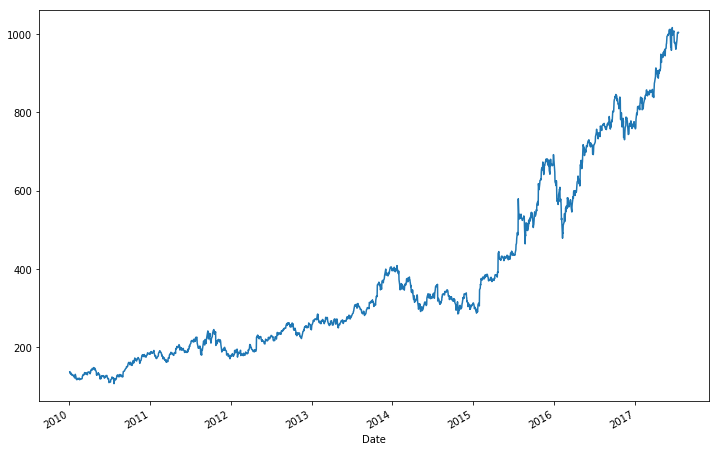

In [33]:
plt.figure(figsize=(12,8))
amzn_stock['Open'].plot();

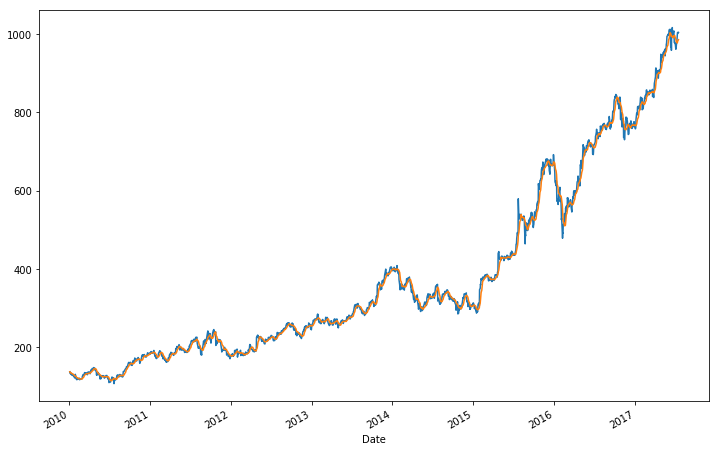

In [37]:
ns = amzn_stock['Open'].rolling(10, min_periods=1).mean()

plt.figure(figsize=(12,8))
amzn_stock['Open'].plot();
ns.plot();

In [38]:
amzn_stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [39]:
amzn_stock.index.weekday_name

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [41]:
amzn_stock.index.weekday_name.value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [44]:
amzn_stock.index.dayofweek.value_counts()

2    390
1    389
3    382
4    380
0    355
Name: Date, dtype: int64

In [45]:
amzn_stock.index.month.value_counts()

3     176
6     172
5     169
4     164
1     160
7     158
8     155
2     154
10    152
12    149
9     144
11    143
Name: Date, dtype: int64

In [50]:
# amzn_stock.index.days_in_month.value_counts()

In [49]:
amzn_stock.index.day.value_counts() # Дні місяця

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64

In [54]:
amzn_stock.index.dayofyear.value_counts().sort_values().iloc[:10]

366    1
359    1
185    1
360    2
2      3
51     3
149    3
186    3
247    3
16     3
Name: Date, dtype: int64

In [55]:
amzn_stock.index.dayofyear.value_counts().sort_index().iloc[:10]

2     3
3     5
4     6
5     6
6     7
7     6
8     5
9     5
10    5
11    6
Name: Date, dtype: int64